# **BUSINESS CASE 2: SIEMENS ADVANTA SALES FORECASTING**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Project Overview  
This notebook utilizes the following datasets:  
- **Case2_Sales Data.csv**:  Daily sales data per GCK (product groups) in EUR
- **Case2_Market Data.xlsx**: Important macro-economic indices for Siemens in its most important countries
- **Case2_Test Set Template.xlsx**: Template for the test set submission

The goal of this project is to forecast the sales of some selected product groups of Siemens in Germany.

## 📊 Goal of the notebook

In this notebook we focus on feature selction 


 ## 1. Initial setup and modules/packages loading

In [150]:
!pip install statsmodels
!pip install openpyxl

In [151]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm



# importing relevant 
from Functions import *

import importlib
imported_module = importlib.import_module("Functions")
importlib.reload(imported_module)

<module 'Functions' from '/Users/aliceviegas/Desktop/BCwDS/BC_DA_Siemens/Notebooks/Functions.py'>

In [152]:
#!pip install openpyxl

In [153]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [154]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

# Feature selection

In [45]:
# Existing product groups in the sales data
df_sales['Mapped_GCK'].unique()

array([ 1, 11, 12, 13, 14, 16, 20,  3, 36,  4,  5,  6,  8,  9])

### **Normality - Shapiro-Wilk Test**  

The **Shapiro-Wilk test** checks whether a time series follows a **normal distribution**. Some statistical models assume normally distributed residuals, making this test useful for understanding data characteristics.  

The hypotheses are:  
- **H₀ (Null Hypothesis):** The data is **normally distributed**.  
- **H₁ (Alternative Hypothesis):** The data **is not normally distributed**.  

If **p-value > 0.05**, we fail to reject H₀, indicating normality. If **p-value ≤ 0.05**, the data is non-normal, and transformations may be considered depending on the modeling approach.


### **Stationarity - Augmented Dickey-Fuller (ADF) Test**  

In time series forecasting, **stationarity is important** to ensure because statitical models assume that the statistical properties of a time series **(mean, variance, autocorrelation)** remain constant over time.  

A time series is **stationary** if it lacks trends or seasonal effects that could mislead the model. **Ensuring stationarity improves forecasting accuracy**, as models can focus on the **true underlying relationships** rather than temporary fluctuations.  

The **Augmented Dickey-Fuller (ADF) test** determines if a time series is **stationary or non-stationary**. If the series is **non-stationary (p > 0.05)**, transformations like **differencing** are applied to remove trends or seasonality, ensuring stability for predictive modeling.

We need to check whether the sales data for each product group is stationary, because stationarity affects model selection and forecasting accuracy. In time series forecasting, stationarity is crucial because many statistical models (e.g., ARIMA, SARIMA, etc.) assume that the underlying data-generating process does not change over time.

A time series is stationary if its statistical properties (mean, variance, autocorrelation) do not change over time. By ensuring stationarity, we remove trends or seasonality that might mislead the model. statistical properties (mean, variance, and autocorrelation) of a time series need to remain constant over time because time series models use past patterns to predict the future.

A stationary series removes distractions like trends and seasonality so that models can focus on the true underlying relationships in the data.


We performed the Augmented Dickey-Fuller test to assess the stationarity of the time series. The hypotheses are:

- H0: The time series has a unit root (it is non-stationary)."
- H1: The time series does not have a unit root (it is stationary).


### **Seasonality - Seasonal Decomposition**  

In time series forecasting, sales data often contains **recurring patterns** at fixed intervals, known as **seasonality**. To understand these patterns, we apply **seasonal decomposition**, which breaks a time series into three main components:  

- **Trend** 📈 → Long-term movement (e.g., increasing or decreasing sales over time).  
- **Seasonality** 🔄 → Repeating fluctuations that occur at regular intervals (e.g., monthly, quarterly).  
- **Residuals** 🎲 → Random variations that cannot be explained by trend or seasonality.  

By separating these components, we gain insights into whether seasonality **significantly impacts sales**, helping us determine how to handle it in forecasting models.  

#### **🔹 How Does Seasonal Decomposition Work?**  
- A **moving average** is used to estimate the **trend**.  
- The remaining seasonal effects are extracted as the **seasonal component**.  
- After removing both trend and seasonality, the residual component shows **random fluctuations**.  

#### **🔹 Why Is This Important in Project Siemens?**  
- Helps identify **seasonal demand patterns** across product groups.  
- Confirms whether certain products have **recurring sales peaks or declines**.  
- If seasonality is strong, we might later **adjust forecasting models accordingly** (e.g., SARIMA instead of ARIMA).  

By applying seasonal decomposition, we ensure that our time series analysis accounts for trends and seasonality **before moving to correlation analysis and forecasting**.

### Correlation - Auto-Correlation (ACF & PACF) and Cross-Correlation

2️⃣ Two Types of Correlation We Will Analyze:
✅ Auto-Correlation (ACF & PACF)

Measures the correlation between a time series and its past values at different time lags.
ACF (Auto-Correlation Function) shows direct and indirect correlations.
PACF (Partial Auto-Correlation Function) isolates direct relationships, filtering out indirect effects.
✅ Cross-Correlation

Measures how one time series correlates with another at different time lags.
Useful to analyze whether external factors (e.g., macroeconomic indices) influence sales.

# Product Group 1

In [46]:
sales_agg1 = get_sales_by_product_group(df_sales, product_group=1)
sales_agg1.head()

,DATE,Sales_EUR
0,2018-10-01,36098918.79
1,2018-11-01,5140760.00
2,2018-12-01,37889612.12
3,2019-01-01,27728148.35
4,2019-02-01,34793163.53


In [47]:
shapiro_result1 = shapiro_wilk_test(sales_agg1['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.682443
p-value: 0.000000

❌ The p-value (0.000000) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



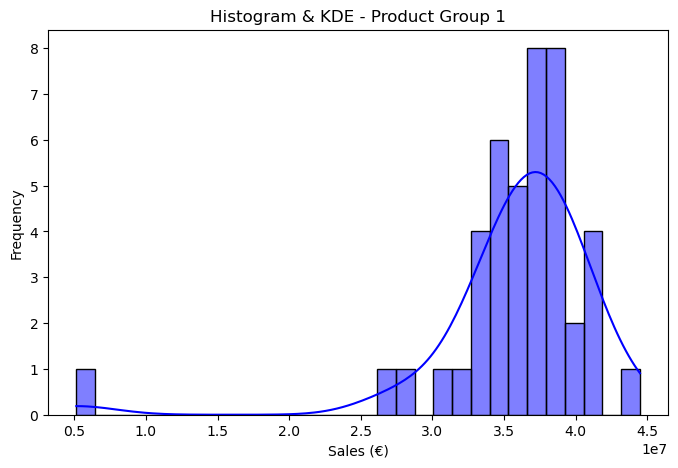

In [48]:
plot_distribution(sales_agg1['Sales_EUR'], product_group=1)

In [49]:
adf_result1 = adf_test(sales_agg1['Sales_EUR'], product_group=1)

Augmented Dickey-Fuller (ADF) Test - Product Group 1
ADF Statistic: -6.002443
p-value: 0.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605

✅ The p-value (0.000000) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



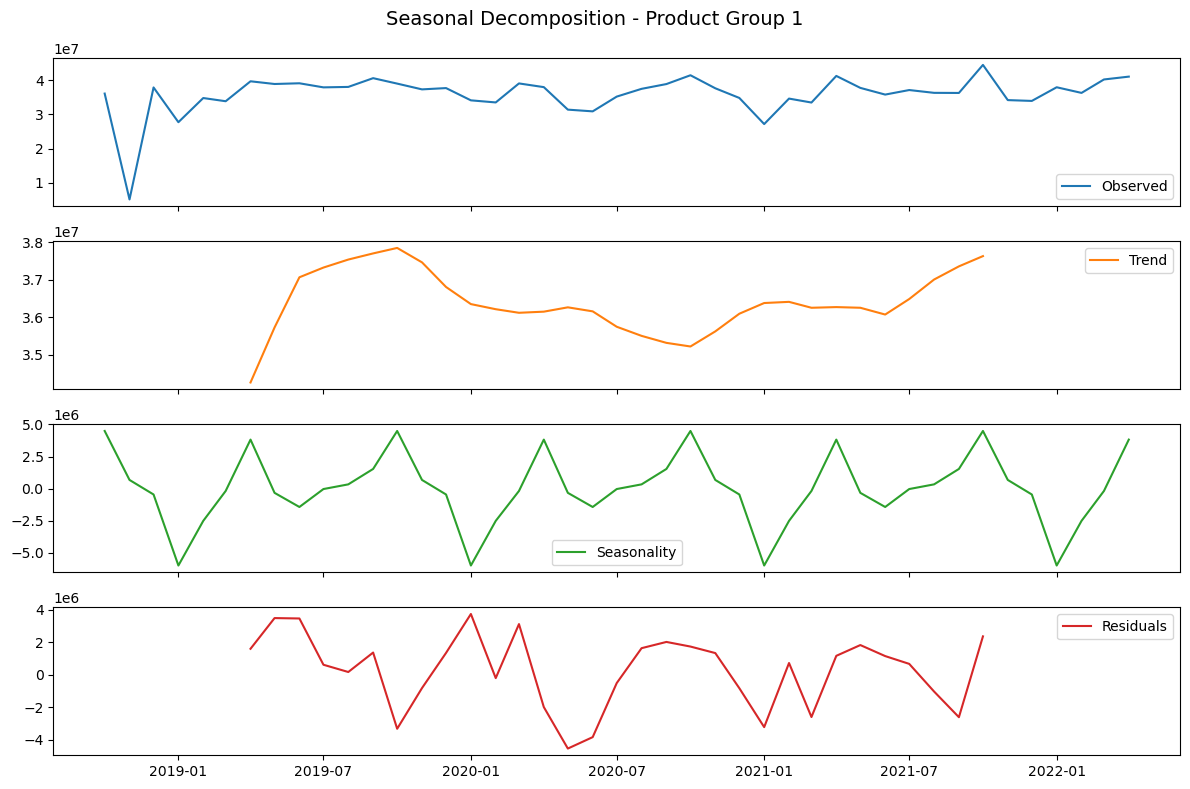

In [50]:
seasonal_decomposition(sales_agg1, product_group=1, date_column='DATE')

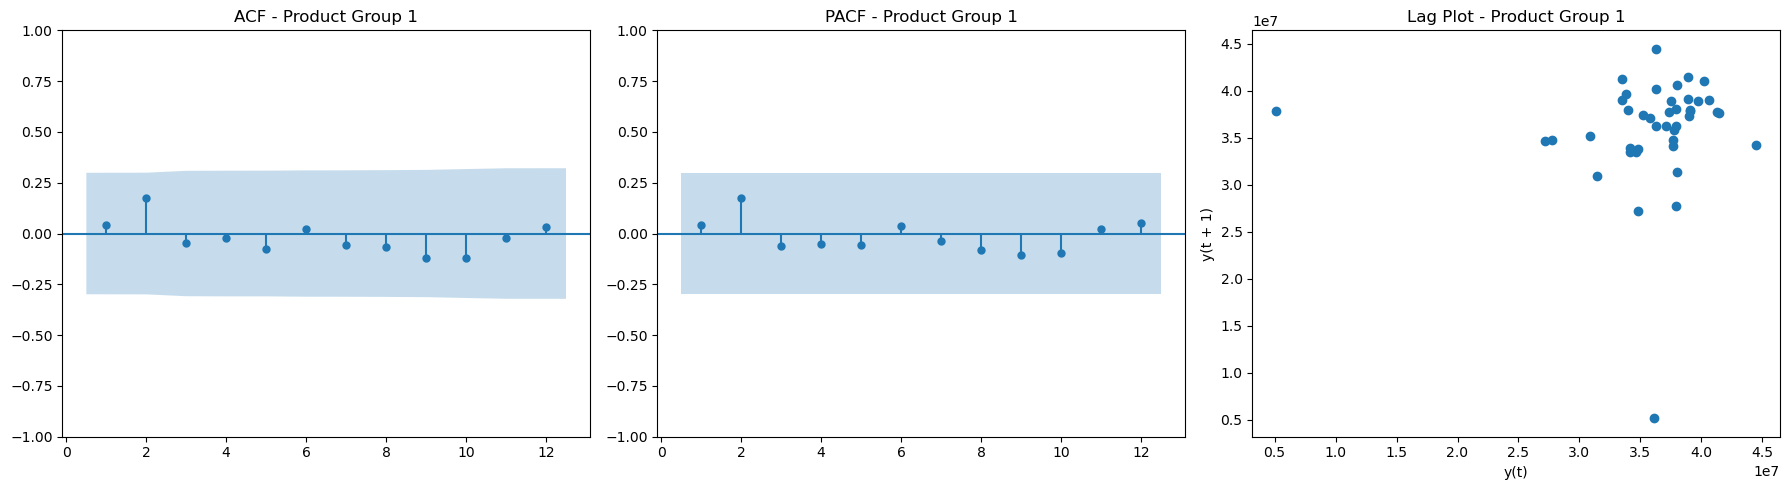

In [51]:
plot_acf_pacf(sales_agg1, product_group=1, max_lag=12)

## feature selection 

In [52]:
relevant_corr_1, selected_features_1 = plot_cross_correlation(
    sales_df=sales_agg1,
    market_df=df_market,
    product_group=1,
    max_lag=6,
    threshold=0.5
)


Selected Features for Product Group:
[]


In [53]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_1)]

filtered_info_market

,Region,Index Name,Index Code


# Product Group 3

In [54]:
sales_agg3 = get_sales_by_product_group(df_sales, product_group=3)
sales_agg3.head()

,DATE,Sales_EUR
0,2018-10-01,8089465.96
1,2018-11-01,11863001.51
2,2018-12-01,8736859.39
3,2019-01-01,10705300.63
4,2019-02-01,10167796.86


In [55]:
shapiro_result3 = shapiro_wilk_test(sales_agg3['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.963334
p-value: 0.183396

✅ The p-value (0.183396) is greater than 0.05.
   We fail to reject the null hypothesis, meaning the data appears normally distributed.



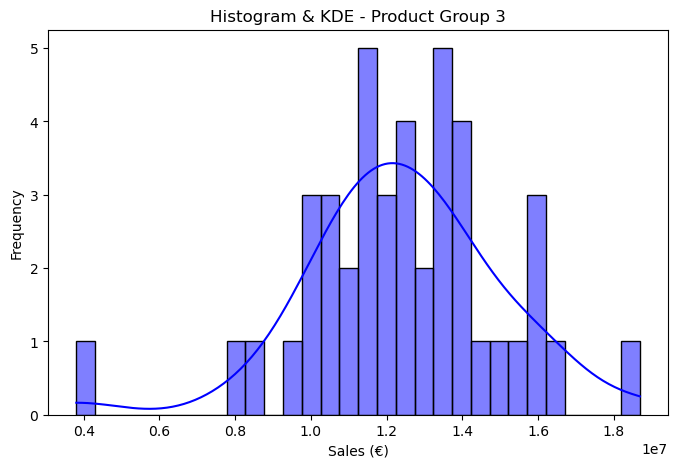

In [56]:
plot_distribution(sales_agg3['Sales_EUR'], product_group=3)

In [57]:
adf_result3 = adf_test(sales_agg3['Sales_EUR'], product_group=3)

Augmented Dickey-Fuller (ADF) Test - Product Group 3
ADF Statistic: -6.590291
p-value: 0.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605

✅ The p-value (0.000000) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



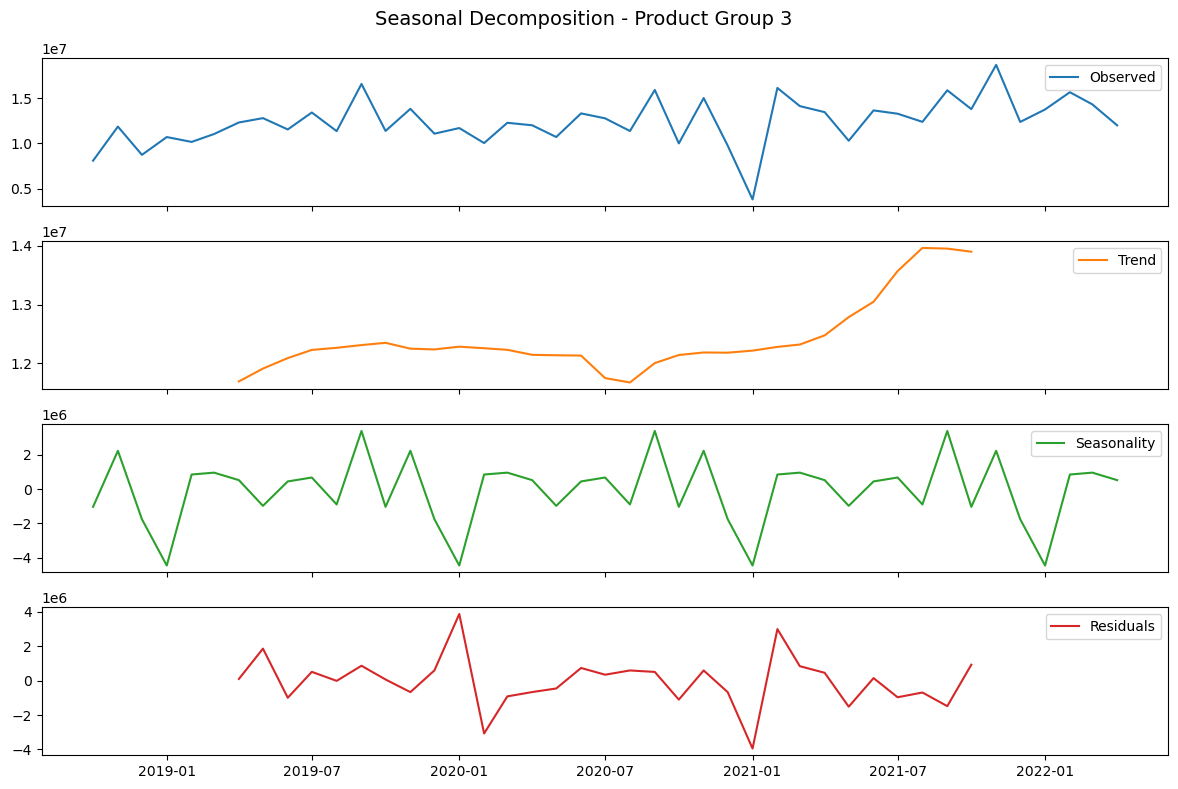

In [58]:
seasonal_decomposition(sales_agg3, product_group=3, date_column='DATE')

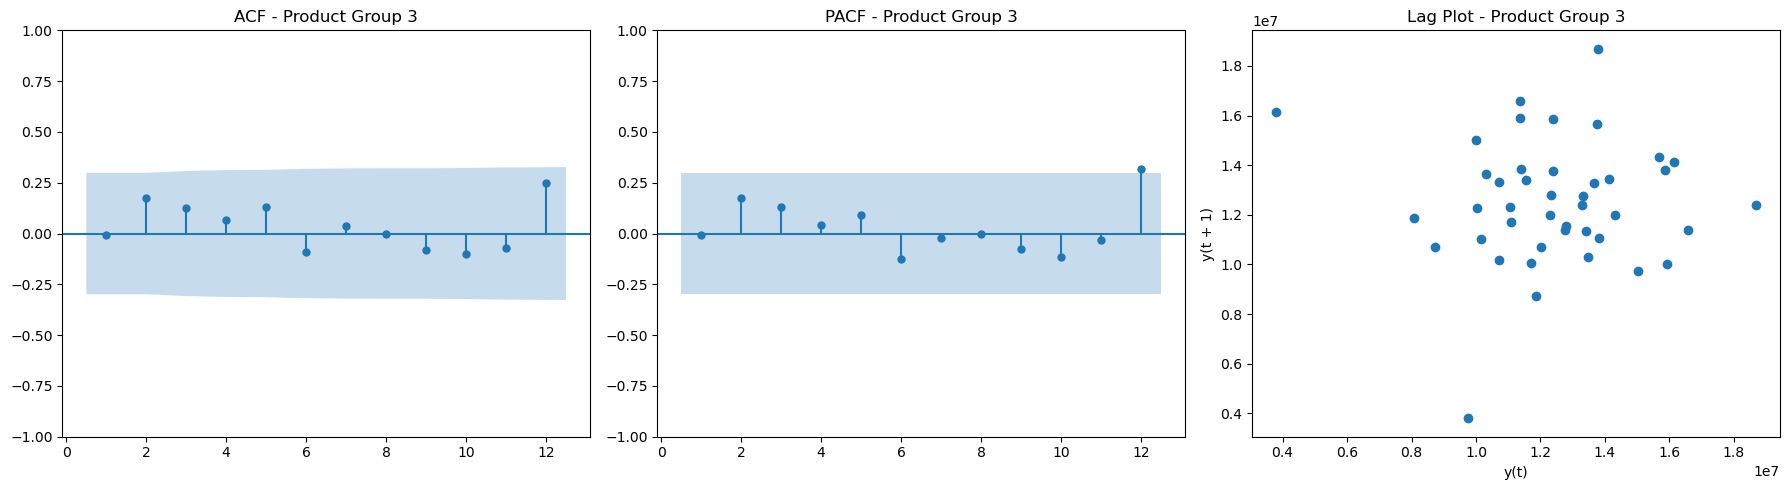

In [59]:
plot_acf_pacf(sales_agg3, product_group=3, max_lag=12)

## Feature selection

In [60]:
relevant_corr_3, selected_features_3 = plot_cross_correlation(
    sales_df=sales_agg3,
    market_df=df_market,
    product_group=3,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


### Autocorrelation

In [61]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_3)]

filtered_info_market

,Region,Index Name,Index Code


# Product Group 4

In [62]:
sales_agg4 = get_sales_by_product_group(df_sales, product_group=4)
sales_agg4.head()

,DATE,Sales_EUR
0,2018-10-01,397760.69
1,2018-11-01,371322.42
2,2018-12-01,430100.96
3,2019-01-01,484173.88
4,2019-02-01,620031.80


In [63]:
shapiro_result4 = shapiro_wilk_test(sales_agg4['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.912683
p-value: 0.003105

❌ The p-value (0.003105) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



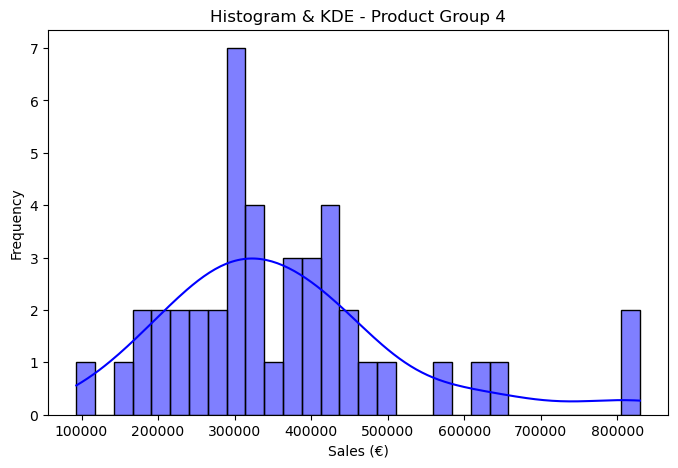

In [64]:
plot_distribution(sales_agg4['Sales_EUR'], product_group=4)

In [65]:
adf_result4 = adf_test(sales_agg4['Sales_EUR'], product_group=4)

Augmented Dickey-Fuller (ADF) Test - Product Group 4
ADF Statistic: -5.319293
p-value: 0.000005
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605

✅ The p-value (0.000005) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



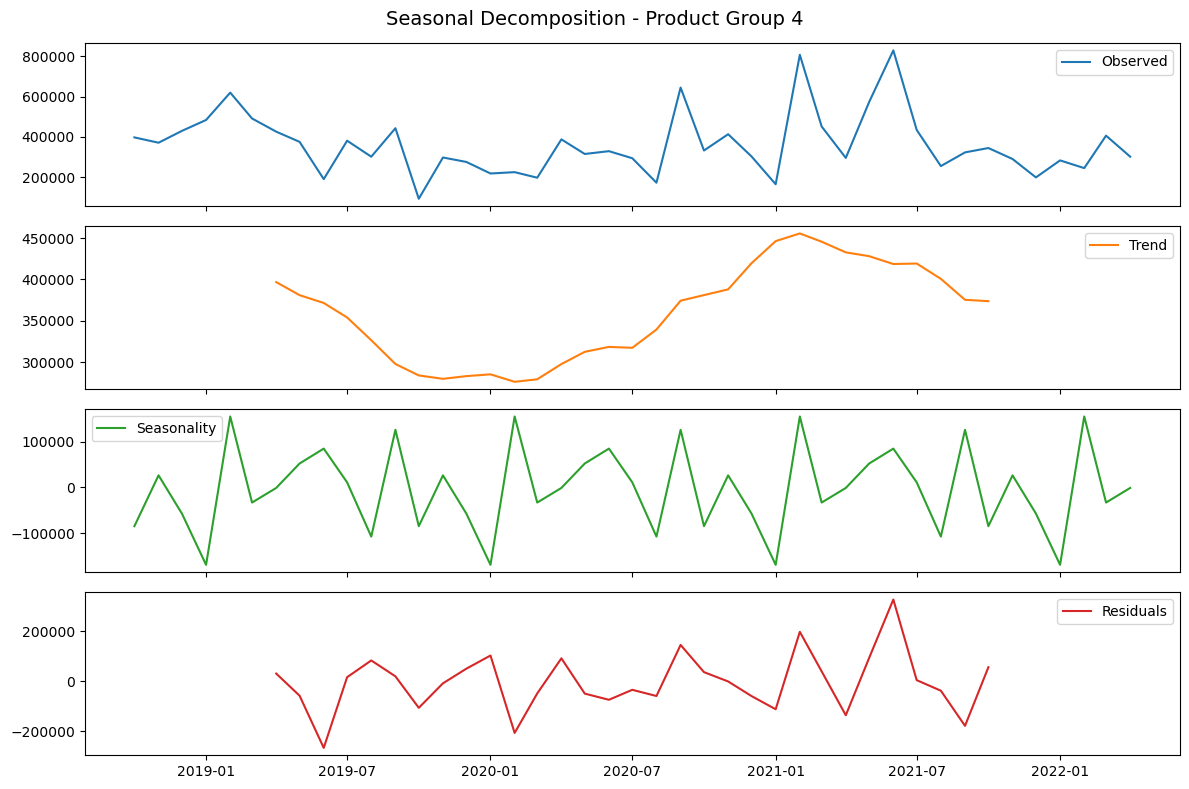

In [66]:
seasonal_decomposition(sales_agg4, product_group=4, date_column='DATE')

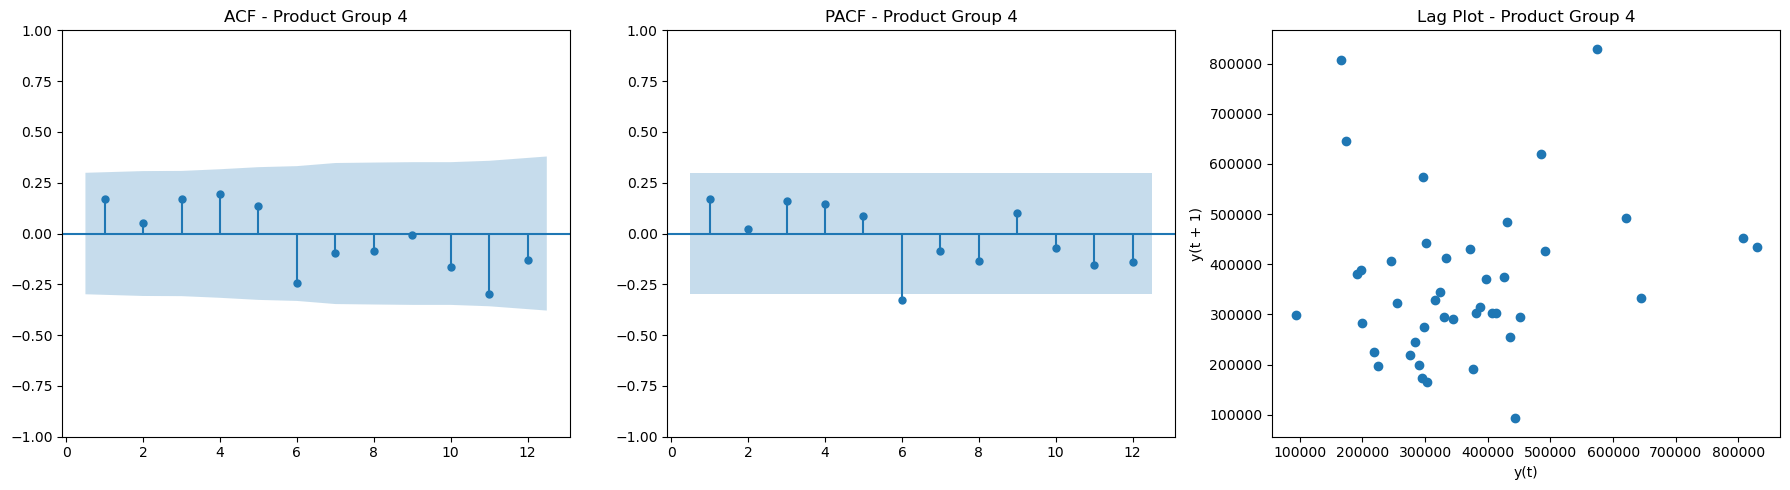

In [67]:
plot_acf_pacf(sales_agg4, product_group=4, max_lag=12)

## Feature selection

In [68]:
relevant_corr_4, selected_features_4 = plot_cross_correlation(
    sales_df=sales_agg4,
    market_df=df_market,
    product_group=4,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


In [69]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_4)]

filtered_info_market

,Region,Index Name,Index Code


# Product Group 5

In [70]:
sales_agg5 = get_sales_by_product_group(df_sales, product_group=5)
sales_agg5.head()

,DATE,Sales_EUR
0,2018-10-01,2499061.19
1,2018-11-01,8993944.04
2,2018-12-01,6947507.31
3,2019-01-01,8233205.07
4,2019-02-01,6879250.99


In [71]:
shapiro_result5 = shapiro_wilk_test(sales_agg5['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.983178
p-value: 0.771690

✅ The p-value (0.771690) is greater than 0.05.
   We fail to reject the null hypothesis, meaning the data appears normally distributed.



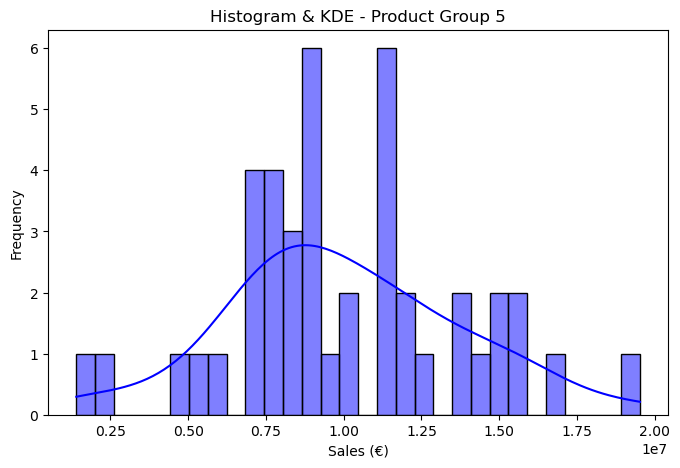

In [72]:
plot_distribution(sales_agg5['Sales_EUR'], product_group=5)

In [73]:
adf_result5 = adf_test(sales_agg5['Sales_EUR'], product_group=5)

Augmented Dickey-Fuller (ADF) Test - Product Group 5
ADF Statistic: -7.636228
p-value: 0.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605

✅ The p-value (0.000000) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



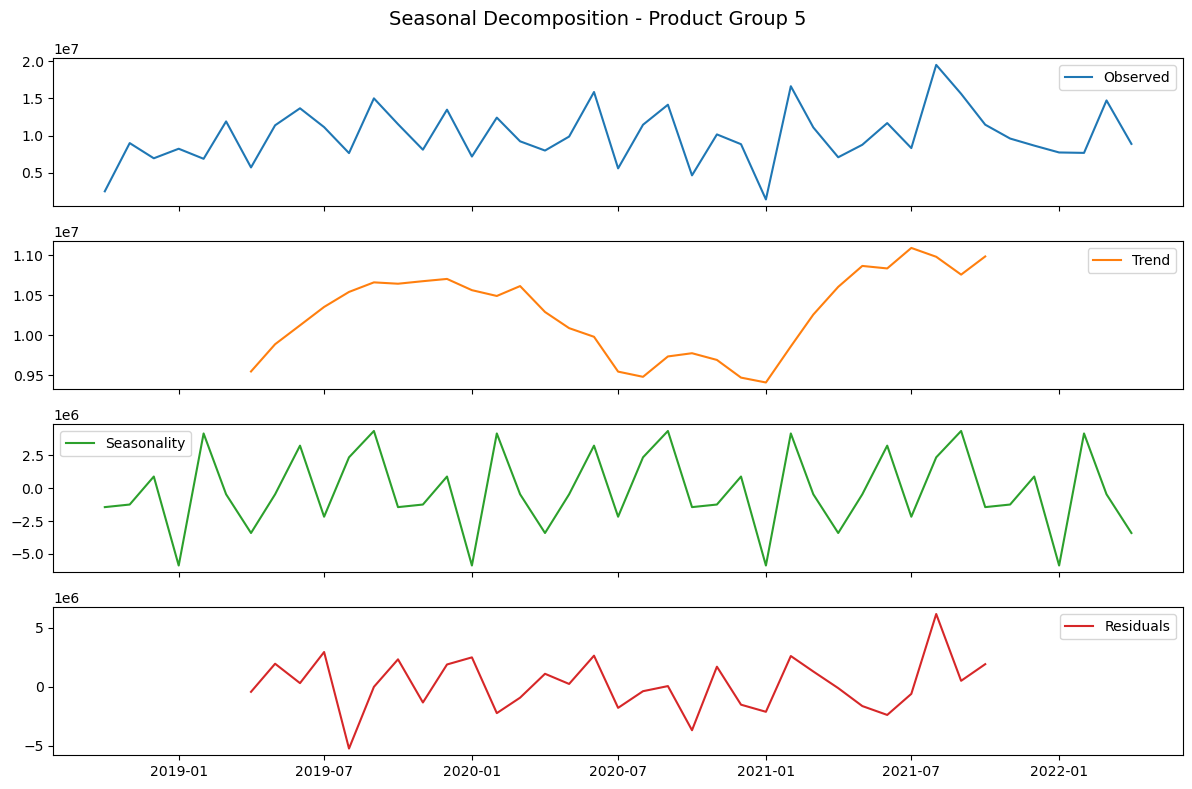

In [74]:
seasonal_decomposition(sales_agg5, product_group=5, date_column='DATE')

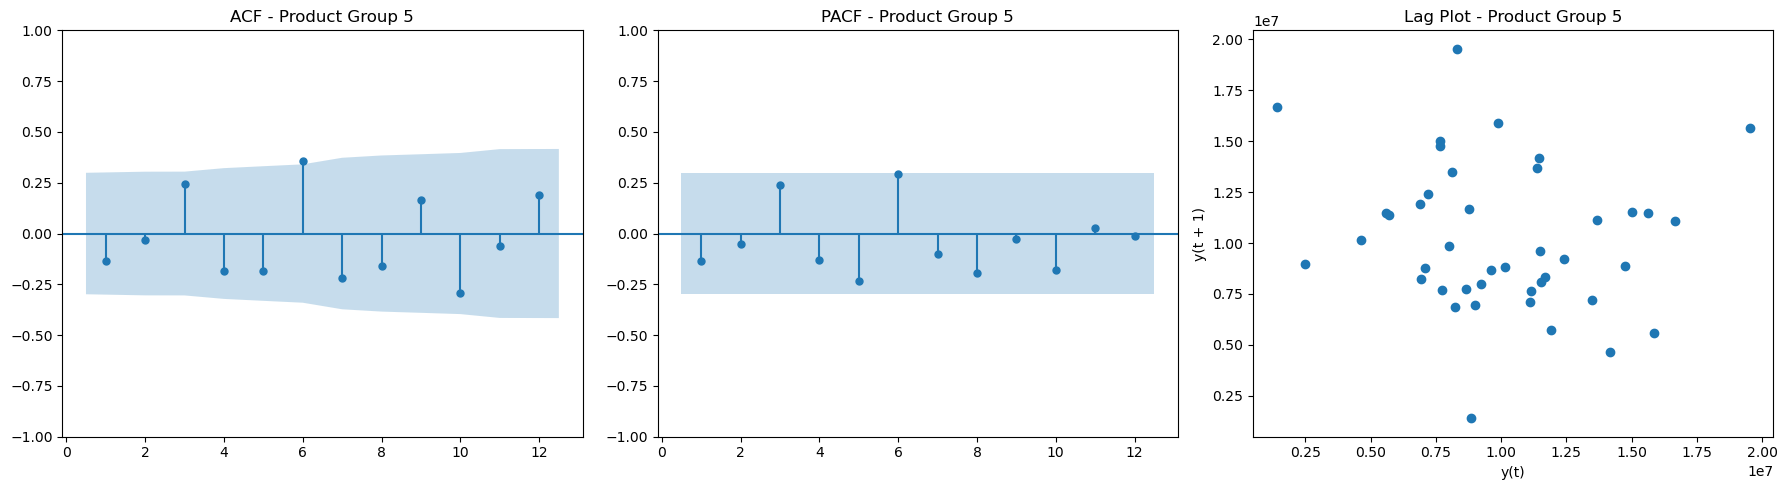

In [75]:
plot_acf_pacf(sales_agg5, product_group=5, max_lag=12)

## Feature selection

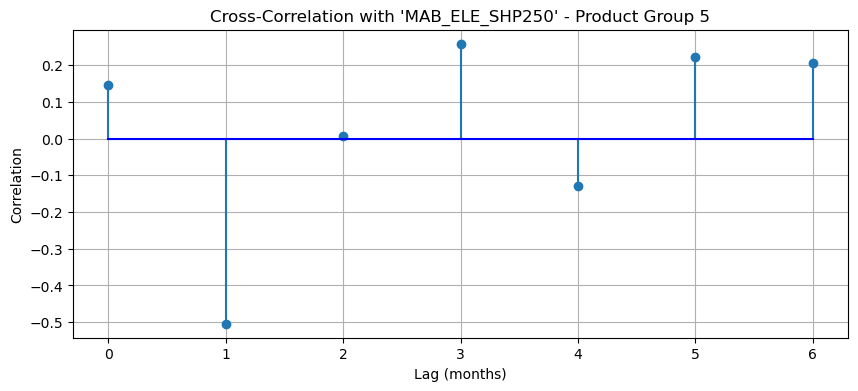

Selected Features for Product Group:
['MAB_ELE_SHP250']


In [76]:
relevant_corr_5, selected_features_5 = plot_cross_correlation(
    sales_df=sales_agg5,
    market_df=df_market,
    product_group=5,
    max_lag=6,
    threshold=0.5
)

### Auto correlation

In [77]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_5)]

filtered_info_market

,Region,Index Name,Index Code
3,France,Shipments Index Machinery & Electricals,MAB_ELE_SHP250


# Product Group 6

In [78]:
sales_agg6 = get_sales_by_product_group(df_sales, product_group=6)
sales_agg6.head()

,DATE,Sales_EUR
0,2018-10-01,369231.60
1,2018-11-01,473046.96
2,2018-12-01,999472.69
3,2019-01-01,598874.10
4,2019-02-01,542037.52


In [79]:
shapiro_result6 = shapiro_wilk_test(sales_agg6['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.981259
p-value: 0.697078

✅ The p-value (0.697078) is greater than 0.05.
   We fail to reject the null hypothesis, meaning the data appears normally distributed.



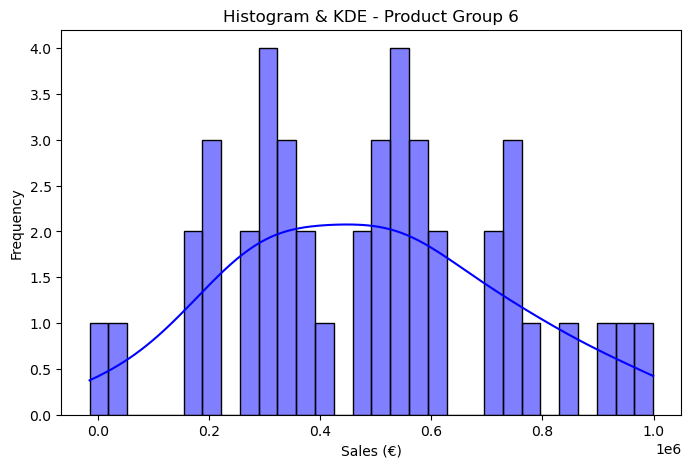

In [80]:
plot_distribution(sales_agg6['Sales_EUR'], product_group=6)

In [81]:
adf_result6 = adf_test(sales_agg6['Sales_EUR'], product_group=6)

Augmented Dickey-Fuller (ADF) Test - Product Group 6
ADF Statistic: -3.477762
p-value: 0.008577
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606

✅ The p-value (0.008577) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



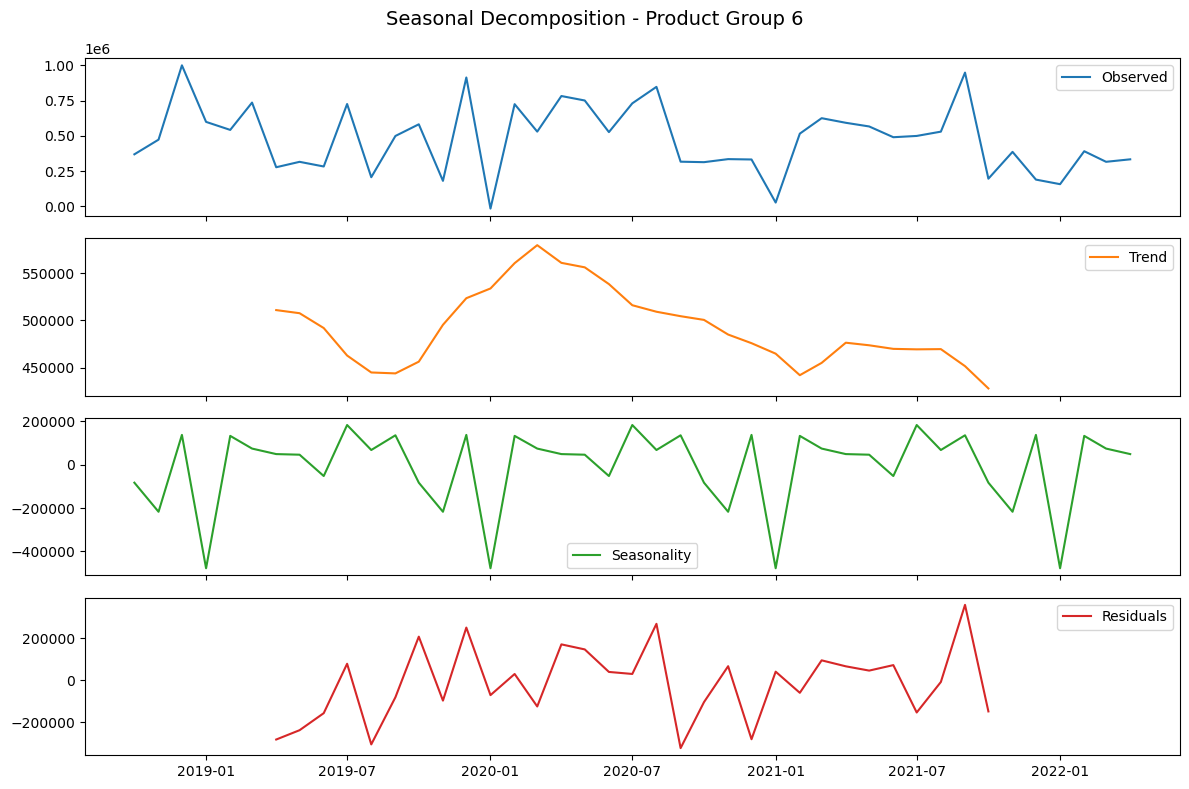

In [82]:
seasonal_decomposition(sales_agg6, product_group=6, date_column='DATE')

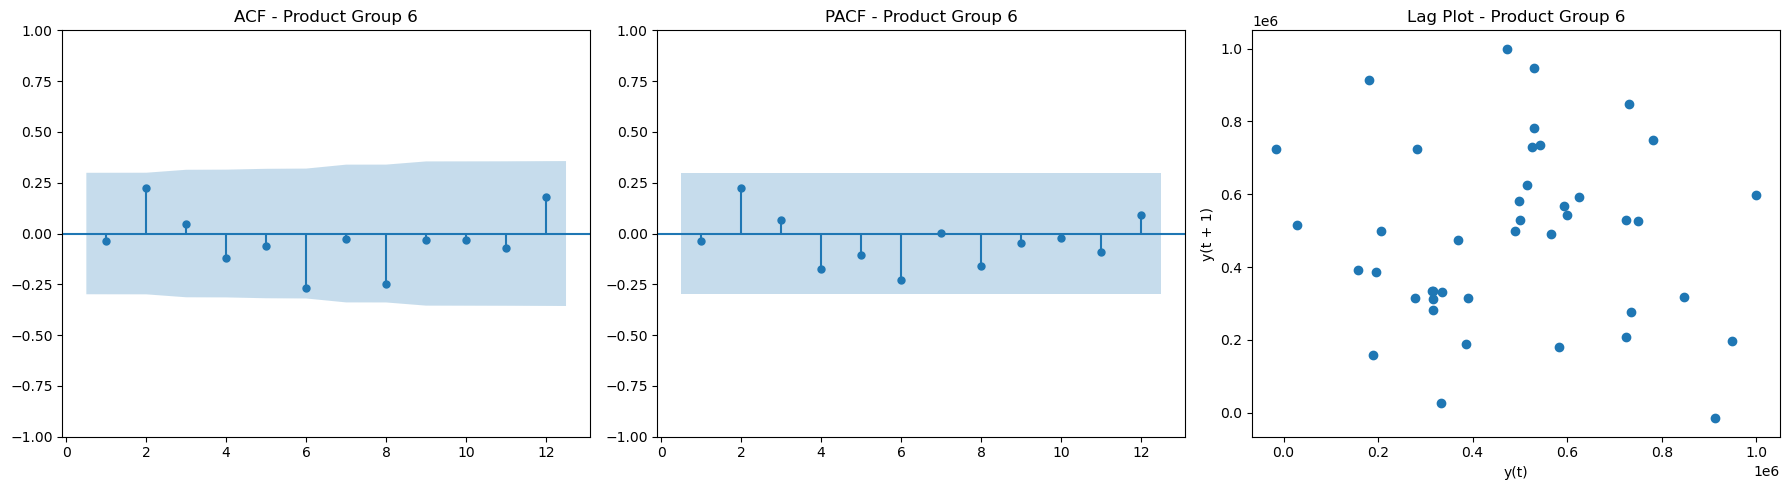

In [83]:
plot_acf_pacf(sales_agg6, product_group=6, max_lag=12)

## Feature selection

### Correlation

In [84]:
relevant_corr_6, selected_features_6 = plot_cross_correlation(
    sales_df=sales_agg6,
    market_df=df_market,
    product_group=6,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


In [85]:


filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_6)]

filtered_info_market

,Region,Index Name,Index Code


# Product Group 8

In [86]:
sales_agg8 = get_sales_by_product_group(df_sales, product_group=8)
sales_agg8.head()

,DATE,Sales_EUR
0,2018-10-01,586052.74
1,2018-11-01,526292.77
2,2018-12-01,271490.71
3,2019-01-01,381400.15
4,2019-02-01,368475.57


In [87]:
shapiro_result8 = shapiro_wilk_test(sales_agg8['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.888547
p-value: 0.000572

❌ The p-value (0.000572) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



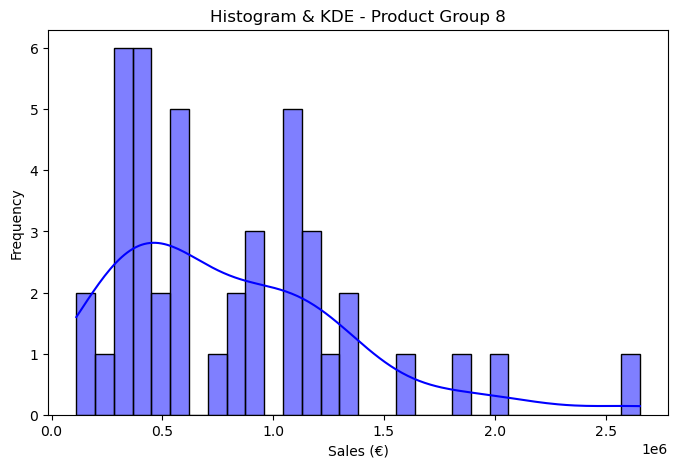

In [88]:
plot_distribution(sales_agg8['Sales_EUR'], product_group=8)

In [89]:
adf_result8 = adf_test(sales_agg8['Sales_EUR'], product_group=8)

Augmented Dickey-Fuller (ADF) Test - Product Group 8
ADF Statistic: 2.340859
p-value: 0.998980
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612

❌ The p-value (0.998980) is > 0.05.
   We fail to reject the null hypothesis, meaning the data is non-stationary.



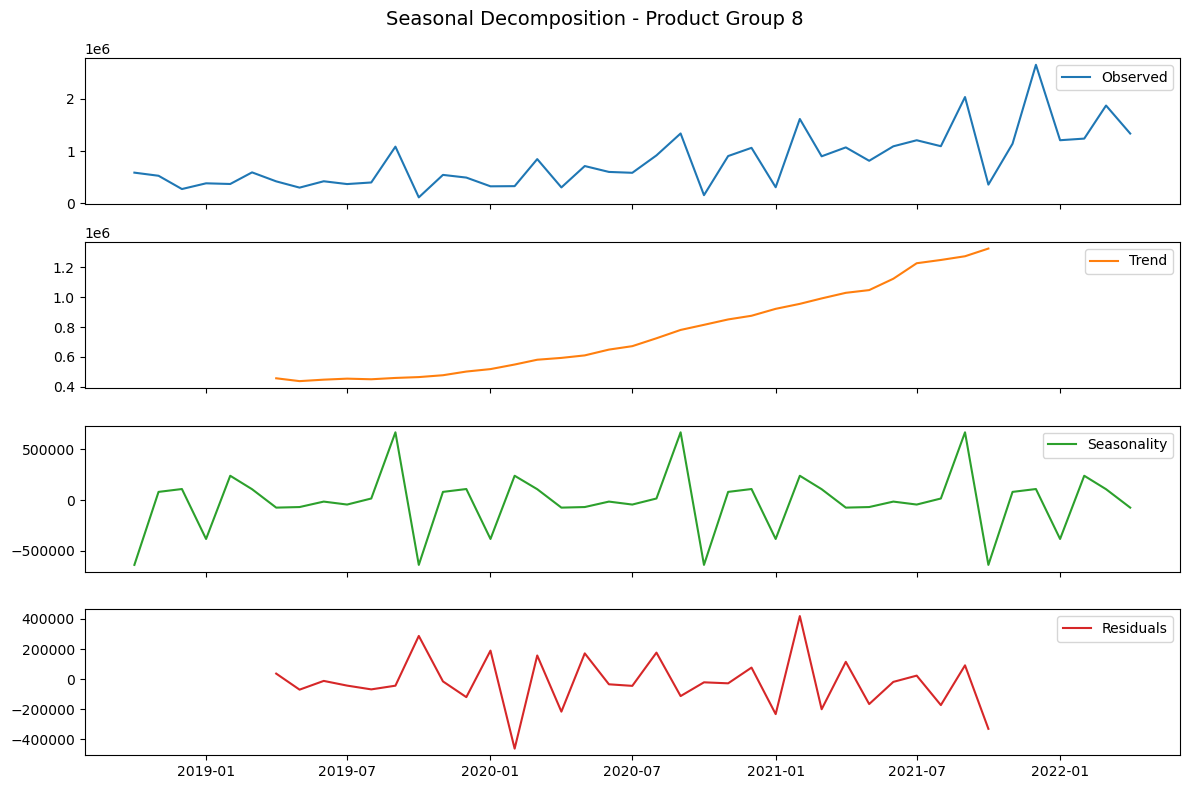

In [90]:
seasonal_decomposition(sales_agg8, product_group=8, date_column='DATE')

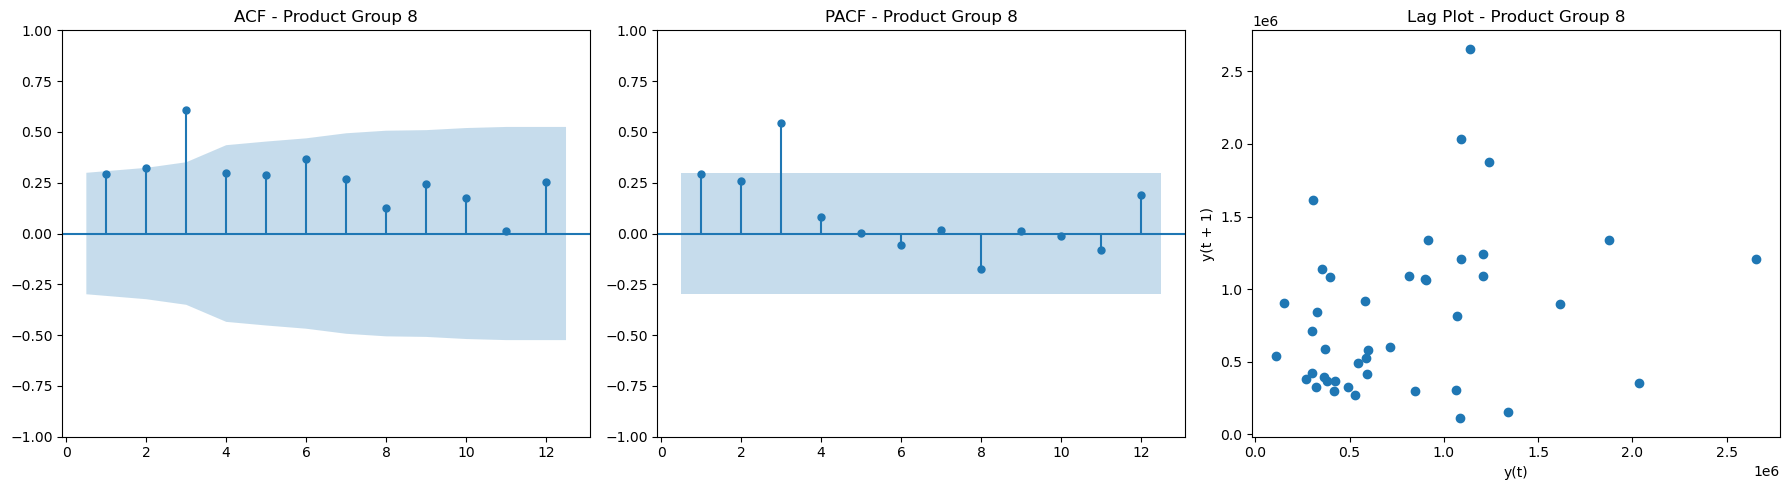

In [91]:
plot_acf_pacf(sales_agg8, product_group=8, max_lag=12)

## Feature seletion

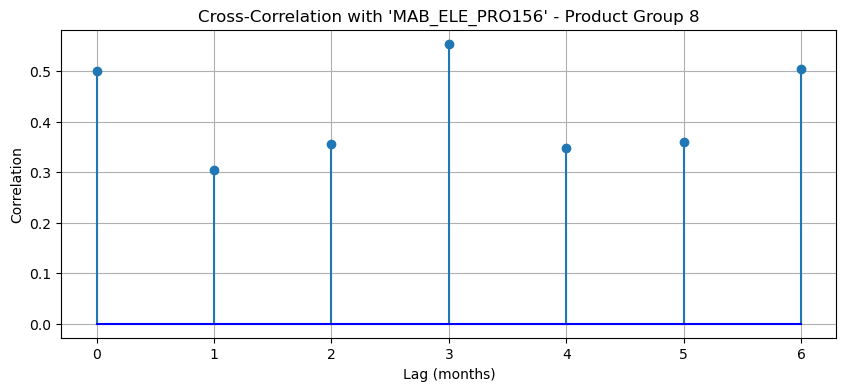

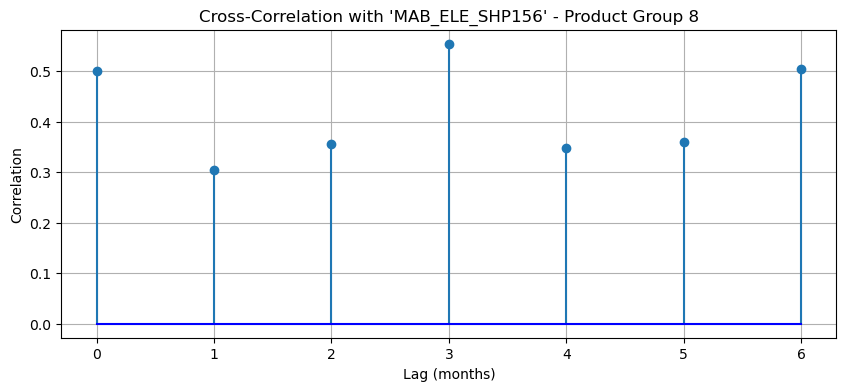

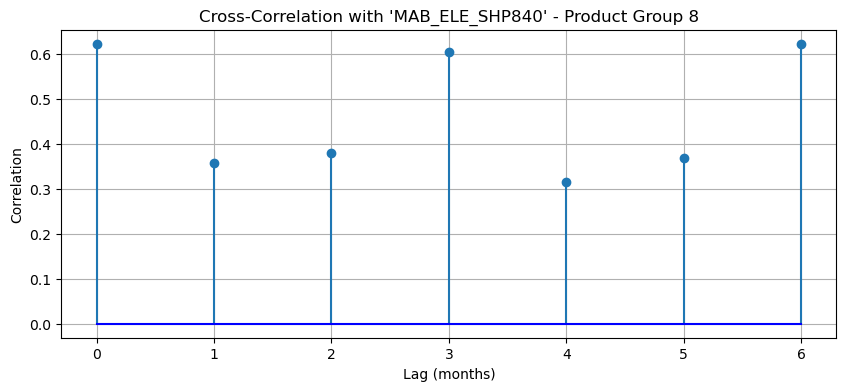

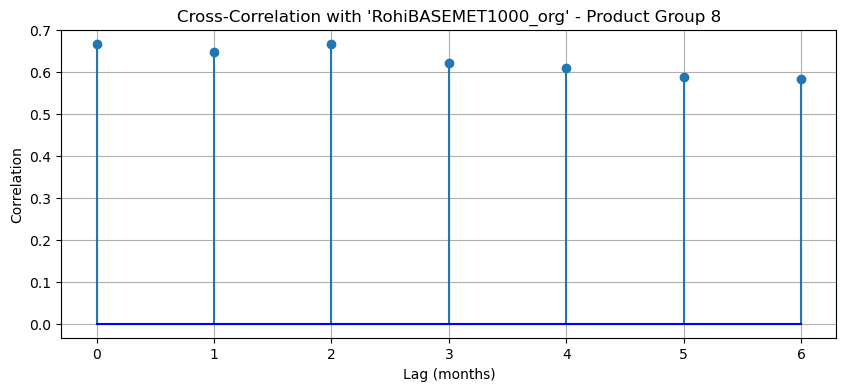

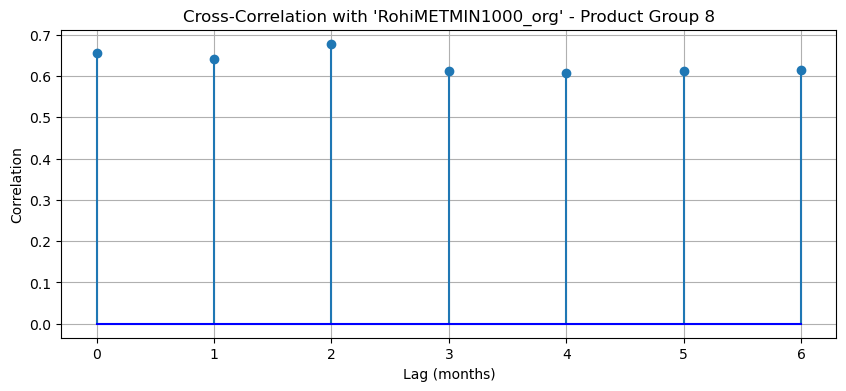

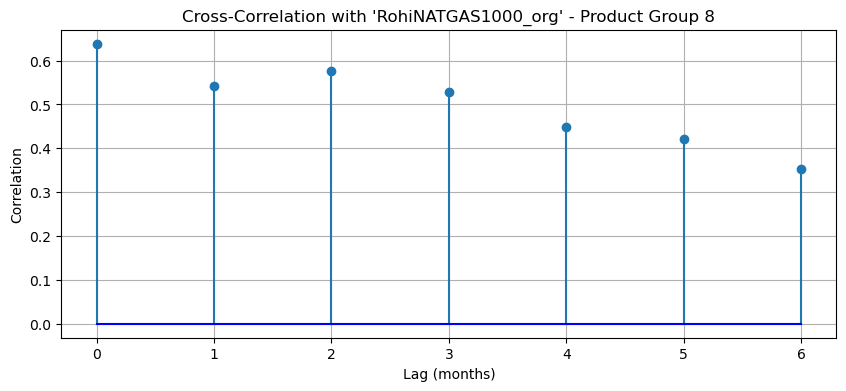

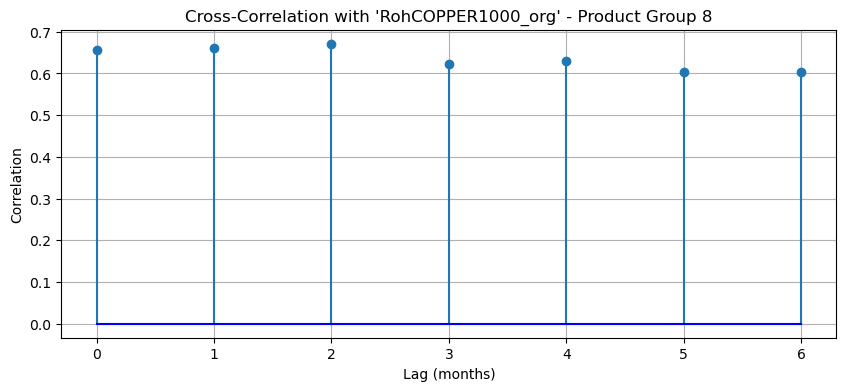

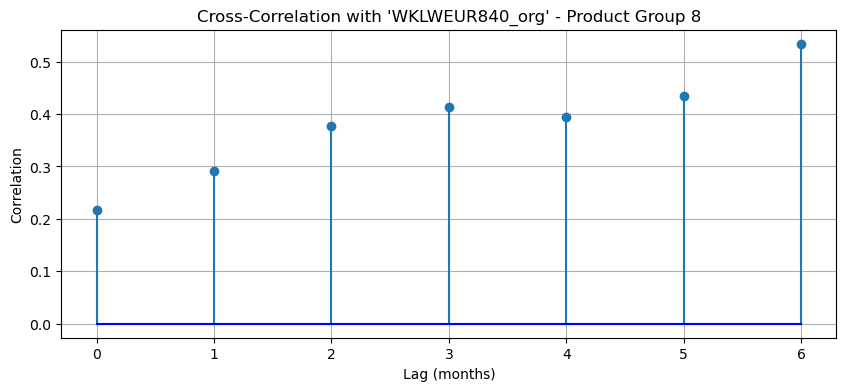

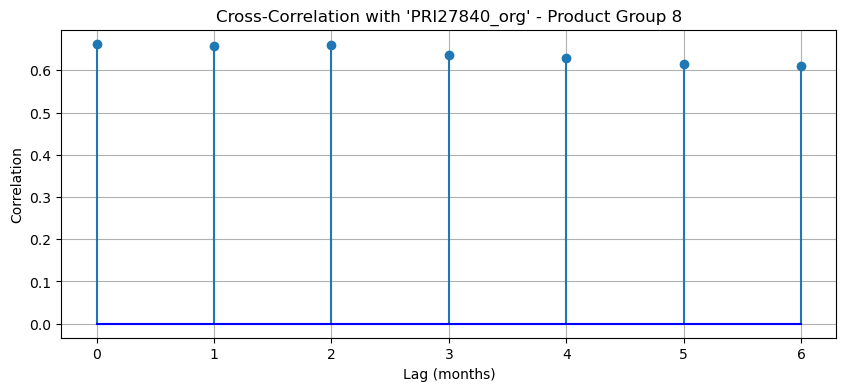

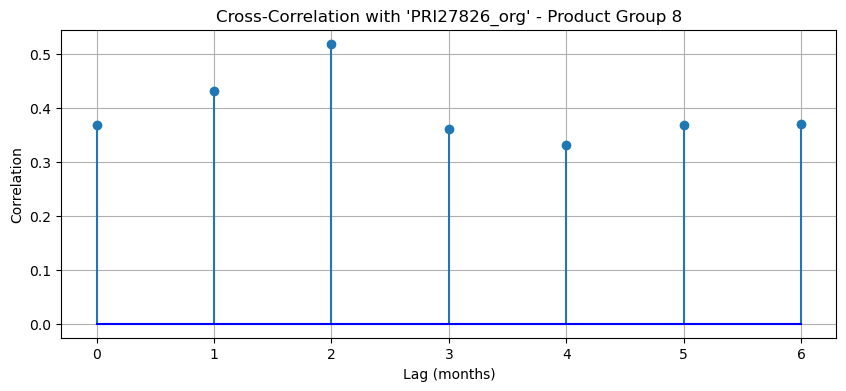

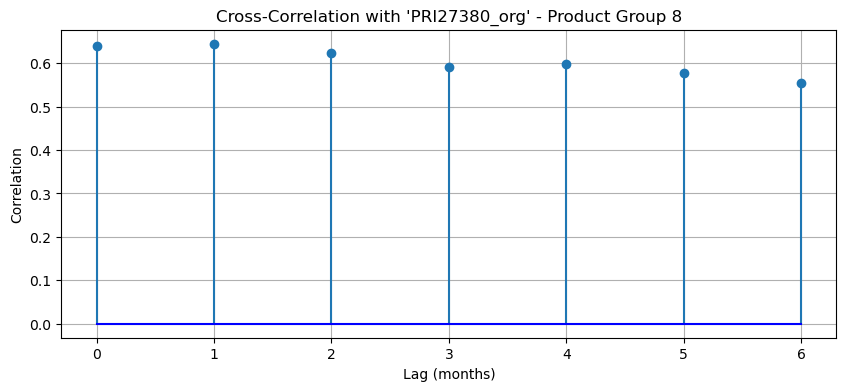

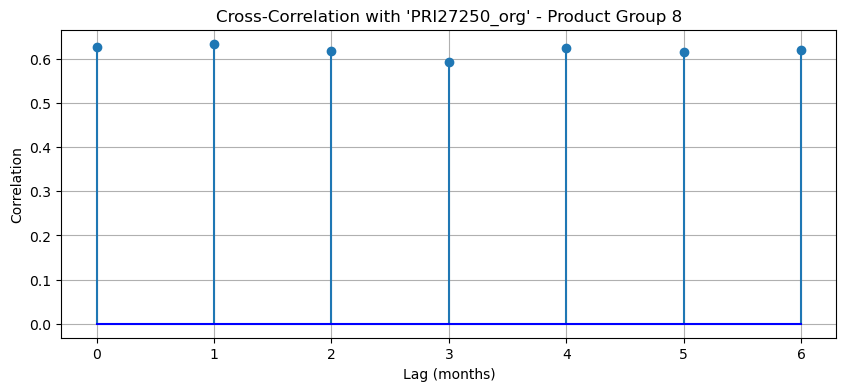

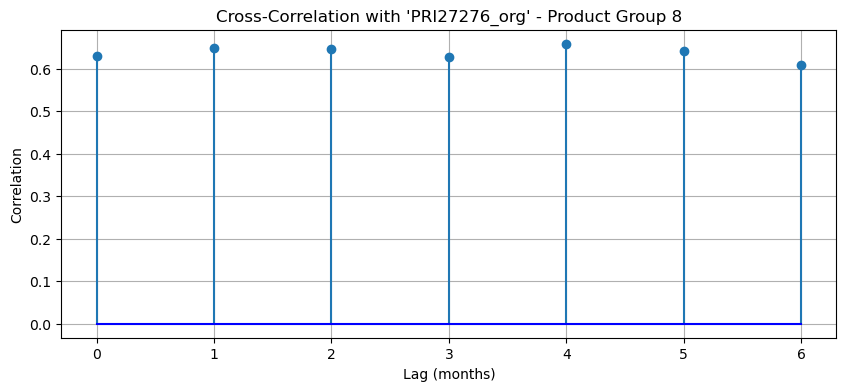

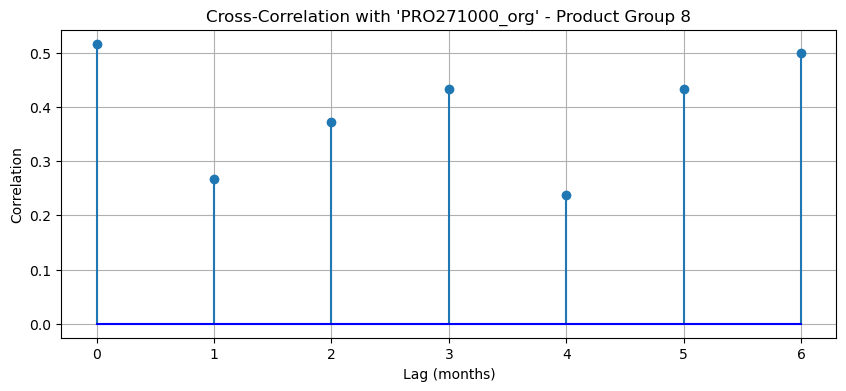

Selected Features for Product Group:
['MAB_ELE_PRO156', 'MAB_ELE_SHP156', 'MAB_ELE_SHP840', 'RohiBASEMET1000_org', 'RohiMETMIN1000_org', 'RohiNATGAS1000_org', 'RohCOPPER1000_org', 'WKLWEUR840_org', 'PRI27840_org', 'PRI27826_org', 'PRI27380_org', 'PRI27250_org', 'PRI27276_org', 'PRO271000_org']


In [92]:
relevant_corr_8, selected_features_8 = plot_cross_correlation(
    sales_df=sales_agg8,
    market_df=df_market,
    product_group=8,
    max_lag=6,
    threshold=0.5
)

### Auto correlation

In [93]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_8)]

filtered_info_market

,Region,Index Name,Index Code
0,China,Production Index Machinery & Electricals,MAB_ELE_PRO156
1,China,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
15,United States,Shipments Index Machinery & Electricals,MAB_ELE_SHP840
18,World,Price of Base Metals,RohiBASEMET1000_org
20,World,Price of Metals & Minerals,RohiMETMIN1000_org
21,World,Price of Natural gas index,RohiNATGAS1000_org
23,World,Price of Copper,RohCOPPER1000_org
24,United States,EUR in LCU,WKLWEUR840_org
25,United States,Electrical equipment,PRI27840_org
26,United Kingdom,Electrical equipment,PRI27826_org


### Differencing Necessary

the sales data was **non-stationary**, likely due to a trend. Stationarity is important for forecasting models, which assume constant statistical properties over time.  

To address this, we applied **first-order differencing**, which removes trends by converting absolute sales values into **changes over time**

This transformation **stabilized the mean** and removed trend-based dependencies.


In [94]:
# First-Order Differencing (Removes Trend)
sales_agg8['Sales_EUR_Diff'] = sales_agg8['Sales_EUR'].diff()

In [95]:
# Drop the missing values resulted from differencing (the first row, that did not have a previous value to subtract)
sales_agg8 = sales_agg8.dropna(subset=['Sales_EUR_Diff'])

In [96]:
# Retest ADF after differencing
adf_result8_diff = adf_test(sales_agg8['Sales_EUR_Diff'], product_group=8)

Augmented Dickey-Fuller (ADF) Test - Product Group 8
ADF Statistic: -4.873763
p-value: 0.000039
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612

✅ The p-value (0.000039) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



# Product Group 9

In [97]:
sales_agg9 = get_sales_by_product_group(df_sales, product_group=9)
sales_agg9.head()

,DATE,Sales_EUR
0,2018-10-01,3219.32
1,2018-11-01,1875.90
2,2018-12-01,0.00
3,2019-01-01,1487.00
4,2019-02-01,3234.28


In [98]:
shapiro_result9 = shapiro_wilk_test(sales_agg9['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.812044
p-value: 0.000007

❌ The p-value (0.000007) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



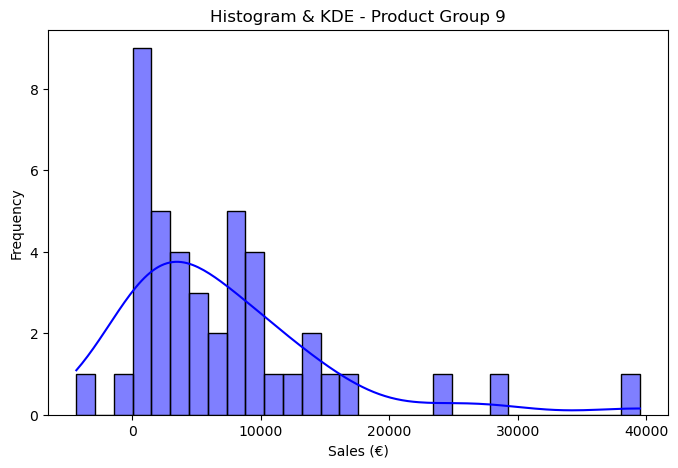

In [99]:
plot_distribution(sales_agg9['Sales_EUR'], product_group=9)

In [100]:
adf_result9 = adf_test(sales_agg9['Sales_EUR'], product_group=9)

Augmented Dickey-Fuller (ADF) Test - Product Group 9
ADF Statistic: -7.013494
p-value: 0.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605

✅ The p-value (0.000000) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



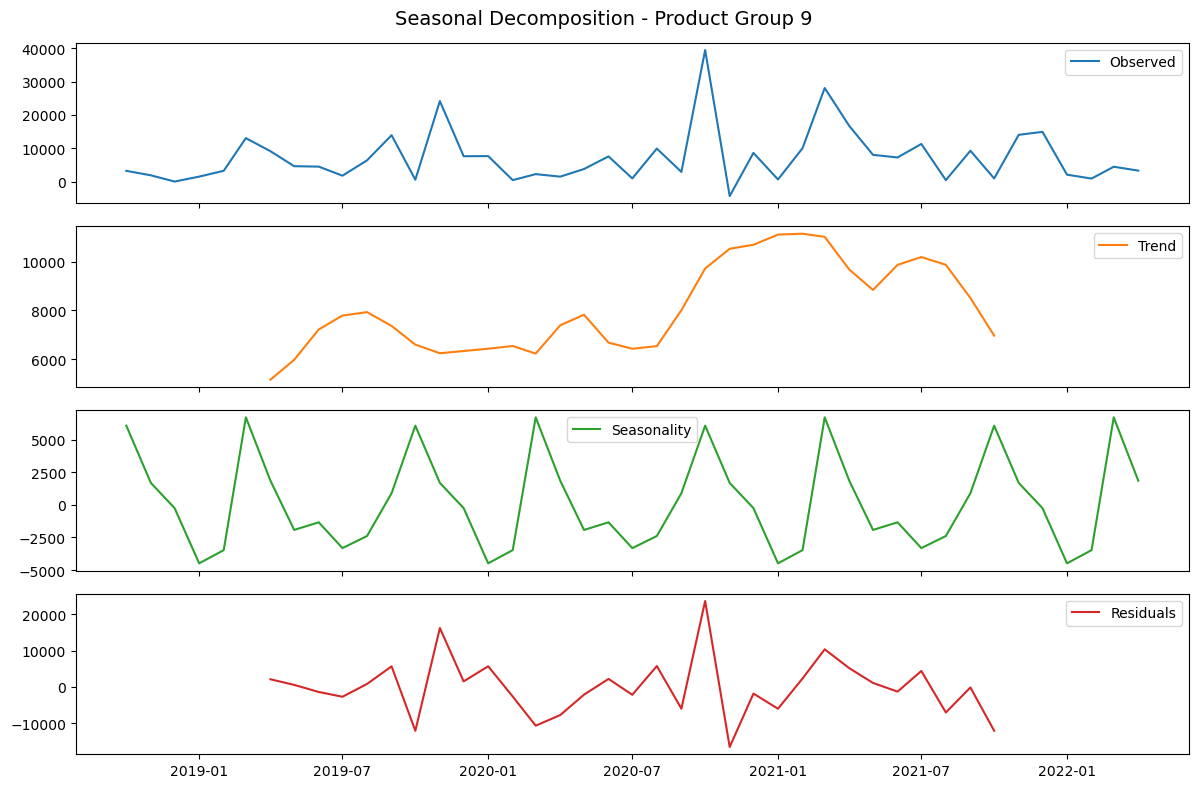

In [101]:
seasonal_decomposition(sales_agg9, product_group=9, date_column='DATE')

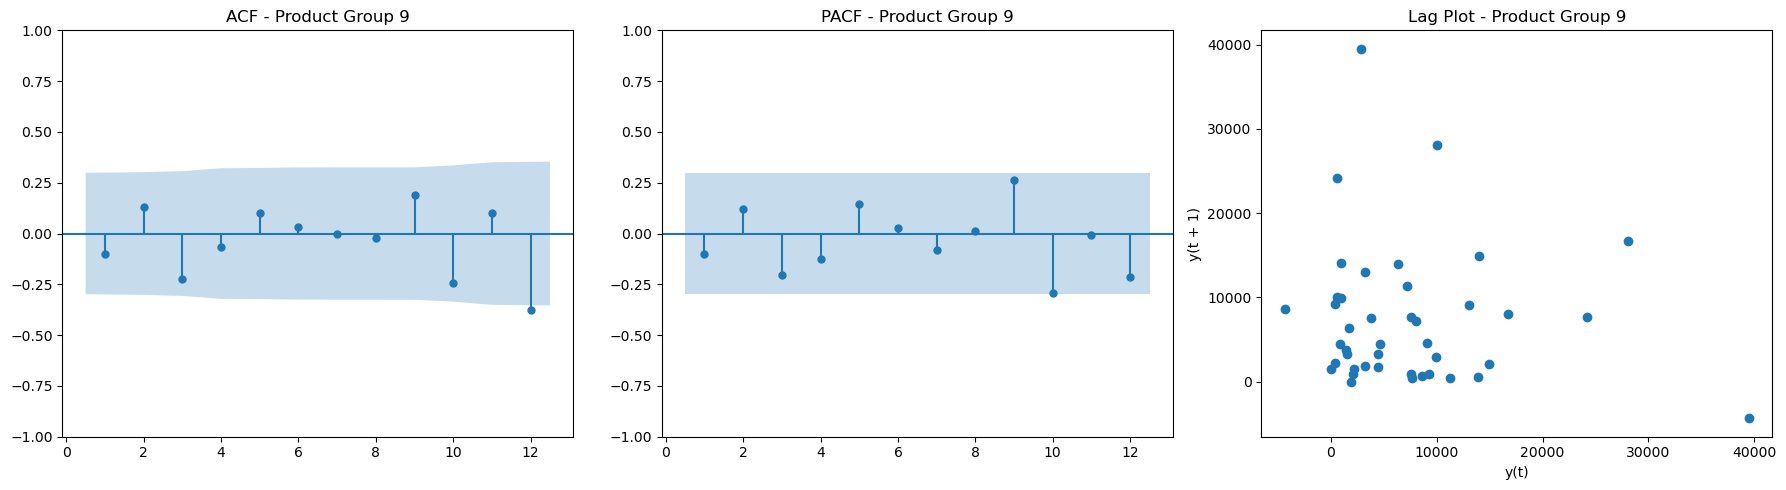

In [102]:
plot_acf_pacf(sales_agg9, product_group=9, max_lag=12)

## Feature selection

In [103]:
relevant_corr_9, selected_features_9 = plot_cross_correlation(
    sales_df=sales_agg9,
    market_df=df_market,
    product_group=9,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


### Auto correlation

In [104]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_9)]

filtered_info_market

,Region,Index Name,Index Code


# Product Group 11

In [105]:
sales_agg11 = get_sales_by_product_group(df_sales, product_group=11)
sales_agg11.head()

,DATE,Sales_EUR
0,2018-10-01,1021303.50
1,2018-11-01,1898844.80
2,2018-12-01,1226122.00
3,2019-01-01,2216391.74
4,2019-02-01,610456.60


In [106]:
shapiro_result11 = shapiro_wilk_test(sales_agg11['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.935275
p-value: 0.017705

❌ The p-value (0.017705) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



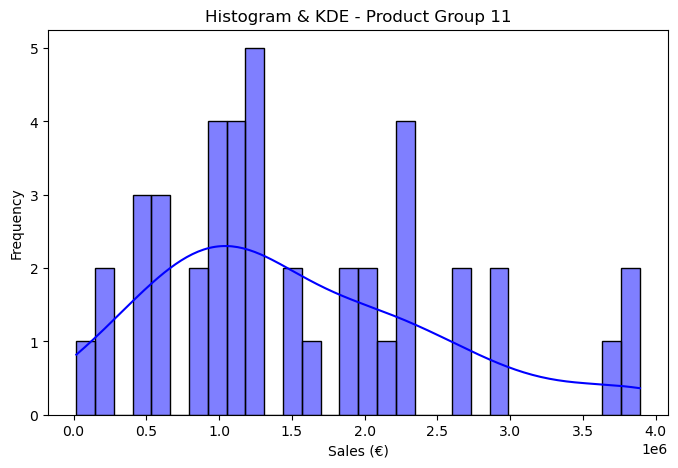

In [107]:
plot_distribution(sales_agg11['Sales_EUR'], product_group=11)

In [108]:
adf_result11 = adf_test(sales_agg11['Sales_EUR'], product_group=11)

Augmented Dickey-Fuller (ADF) Test - Product Group 11
ADF Statistic: -5.577923
p-value: 0.000001
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606

✅ The p-value (0.000001) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



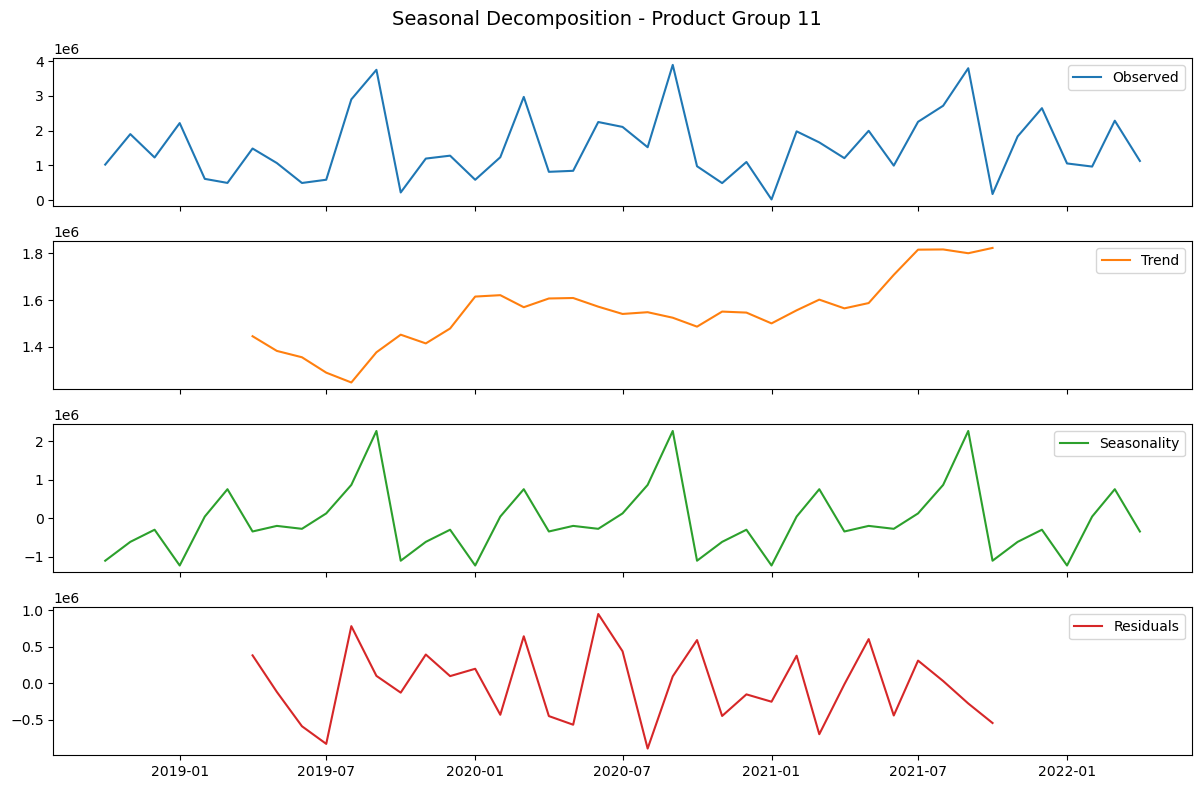

In [109]:
seasonal_decomposition(sales_agg11, product_group=11, date_column='DATE')

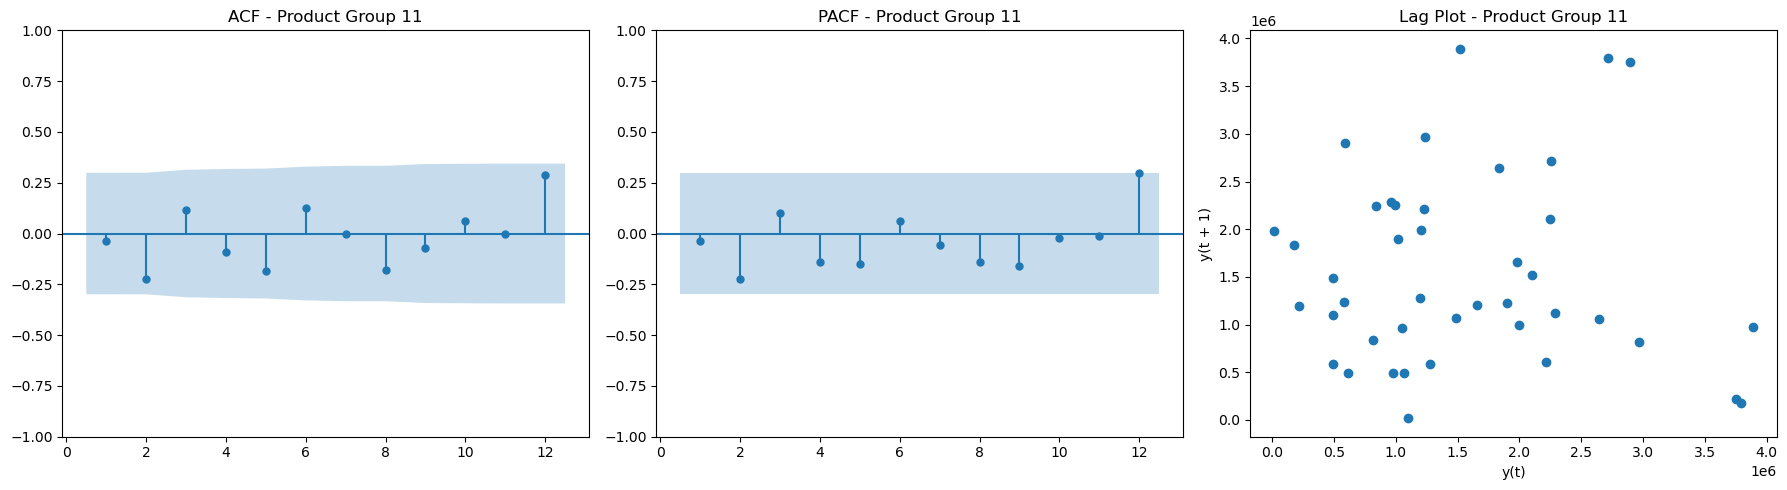

In [110]:
plot_acf_pacf(sales_agg11, product_group=11, max_lag=12)

## Feature selection

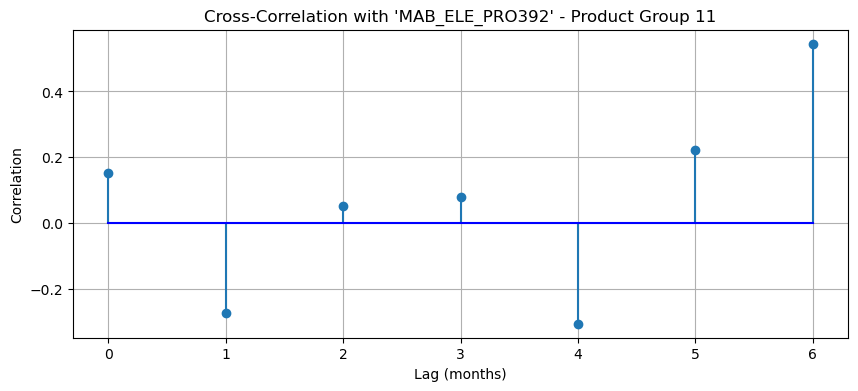

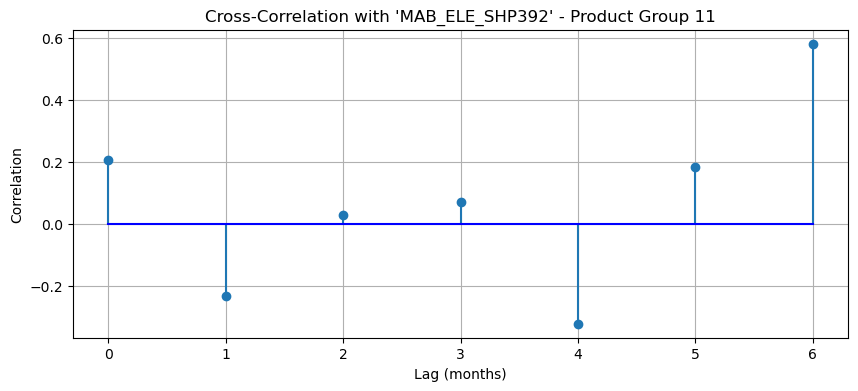

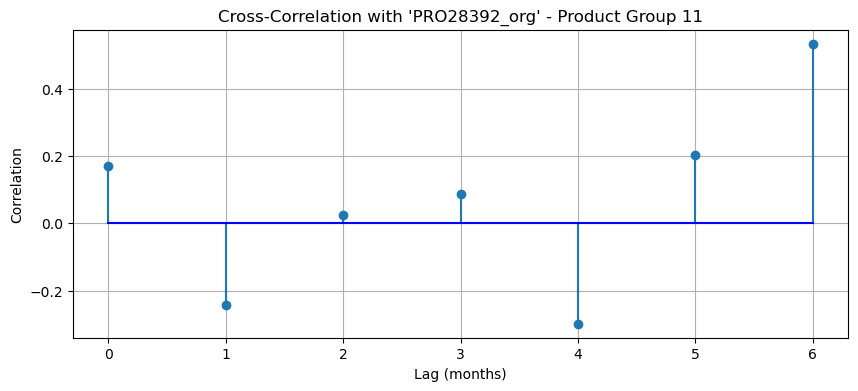

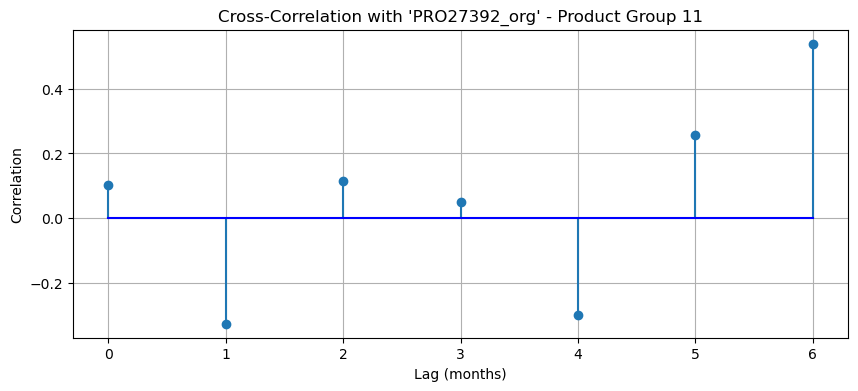

Selected Features for Product Group:
['MAB_ELE_PRO392', 'MAB_ELE_SHP392', 'PRO28392_org', 'PRO27392_org']


In [111]:
relevant_corr_11, selected_features_11 = plot_cross_correlation(
    sales_df=sales_agg11,
    market_df=df_market,
    product_group=11,
    max_lag=6,
    threshold=0.5
)

In [112]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_11)]

filtered_info_market

,Region,Index Name,Index Code
8,Japan,Production Index Machinery & Electricals,MAB_ELE_PRO392
9,Japan,Shipments Index Machinery & Electricals,MAB_ELE_SHP392
36,Japan,Machinery and equipment n.e.c.,PRO28392_org
44,Japan,Electrical equipment,PRO27392_org


# Product Group 12

In [113]:
sales_agg12 = get_sales_by_product_group(df_sales, product_group=12)
sales_agg12.head()

,DATE,Sales_EUR
0,2018-10-01,28686.33
1,2018-11-01,1070.00
2,2018-12-01,17880.60
3,2019-01-01,21484.00
4,2019-02-01,34214.74


In [114]:
shapiro_result12 = shapiro_wilk_test(sales_agg12['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.920265
p-value: 0.005472

❌ The p-value (0.005472) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



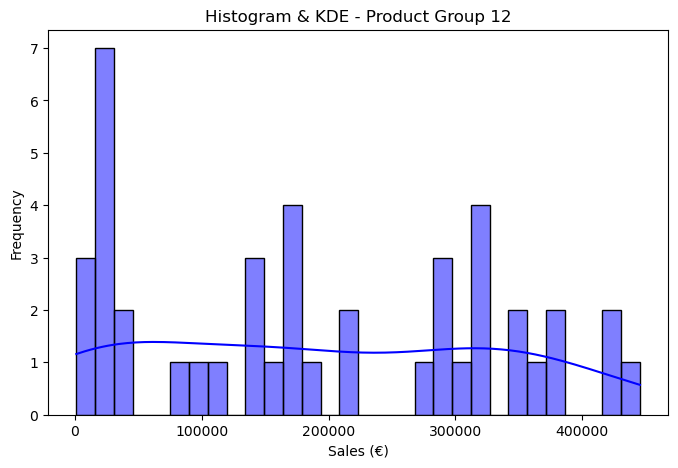

In [115]:
plot_distribution(sales_agg12['Sales_EUR'], product_group=12)

In [116]:
adf_result12 = adf_test(sales_agg12['Sales_EUR'], product_group=12)

Augmented Dickey-Fuller (ADF) Test - Product Group 12
ADF Statistic: -3.869337
p-value: 0.002272
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605

✅ The p-value (0.002272) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



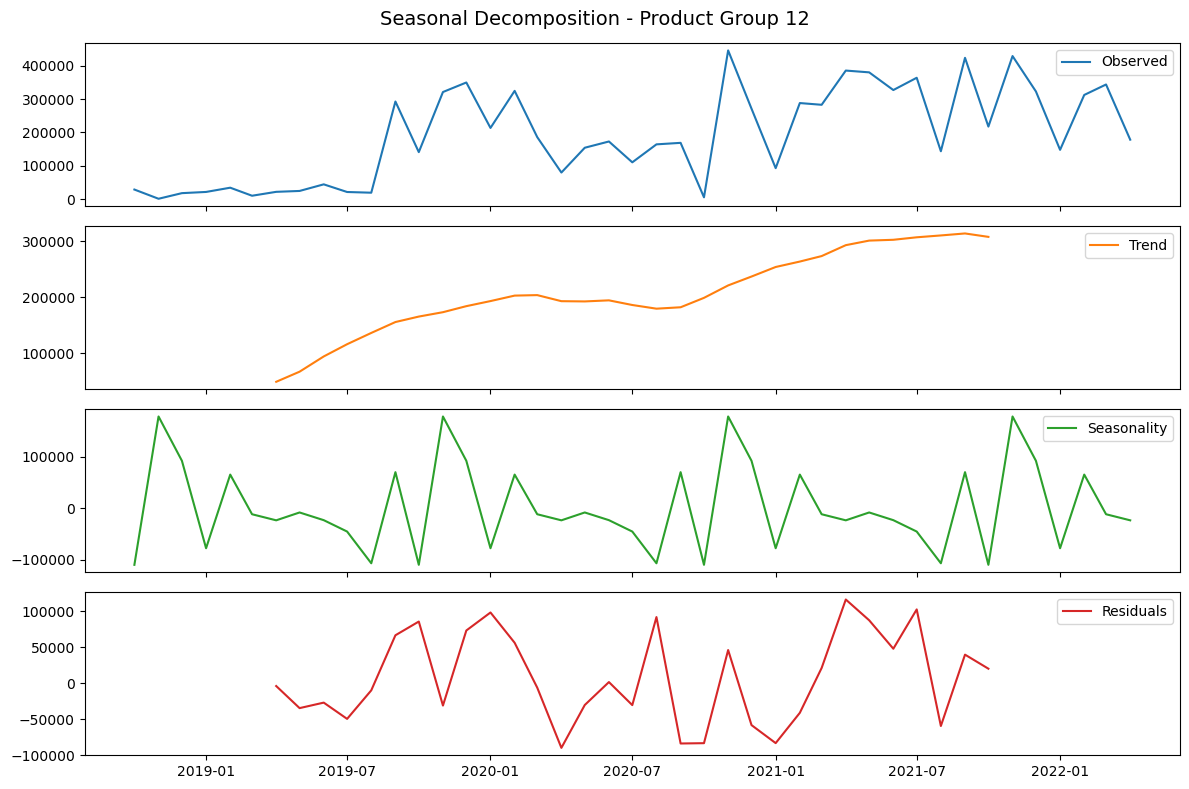

In [117]:
seasonal_decomposition(sales_agg12, product_group=12, date_column='DATE')

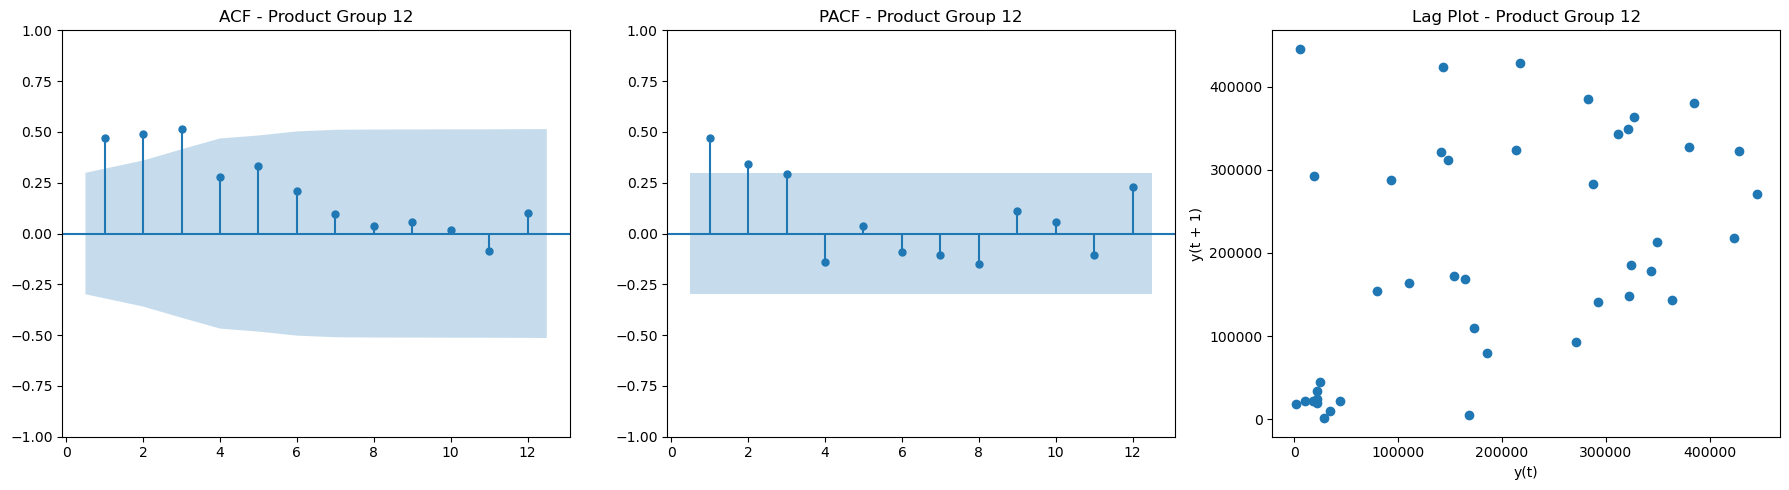

In [118]:
plot_acf_pacf(sales_agg12, product_group=12, max_lag=12)

## Feature selection

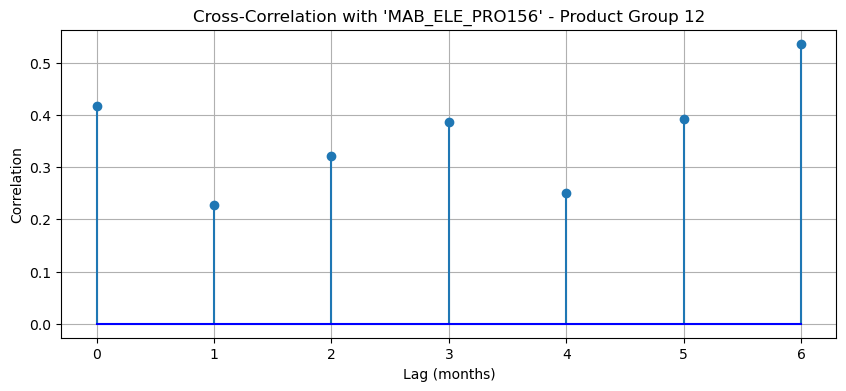

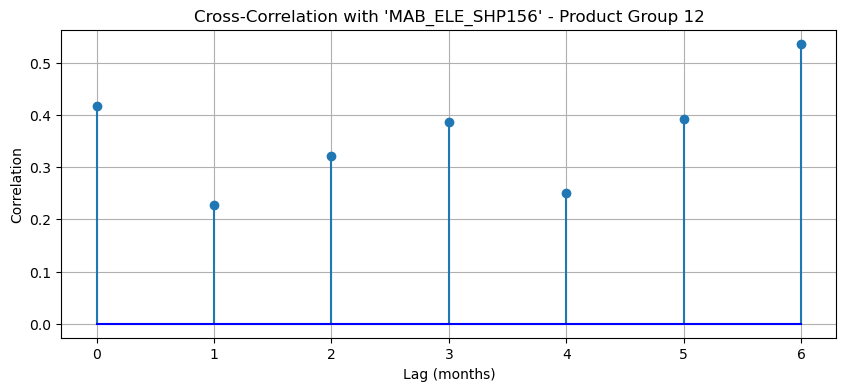

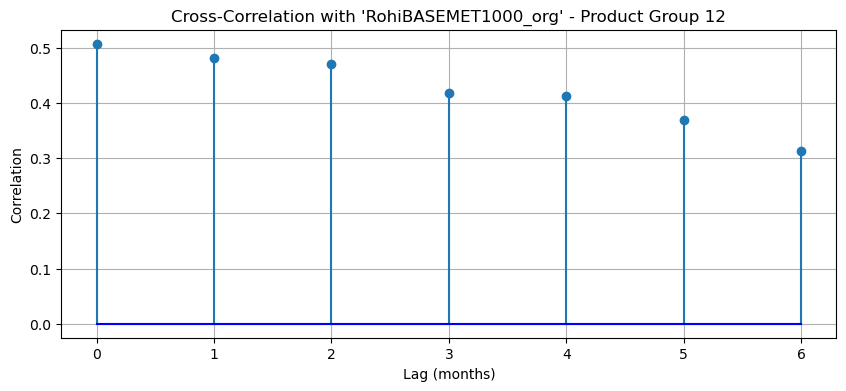

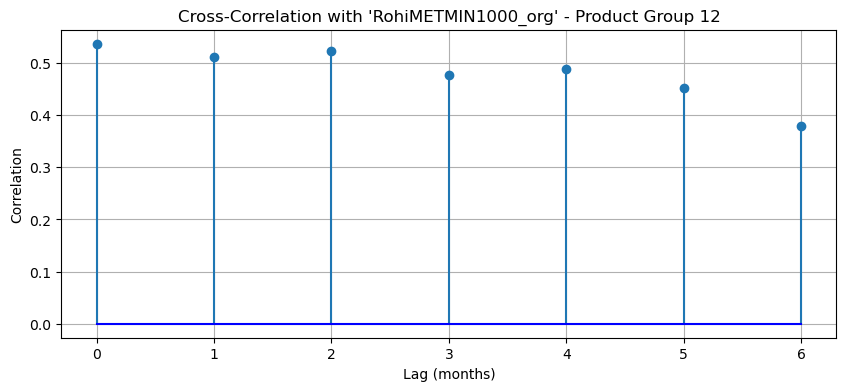

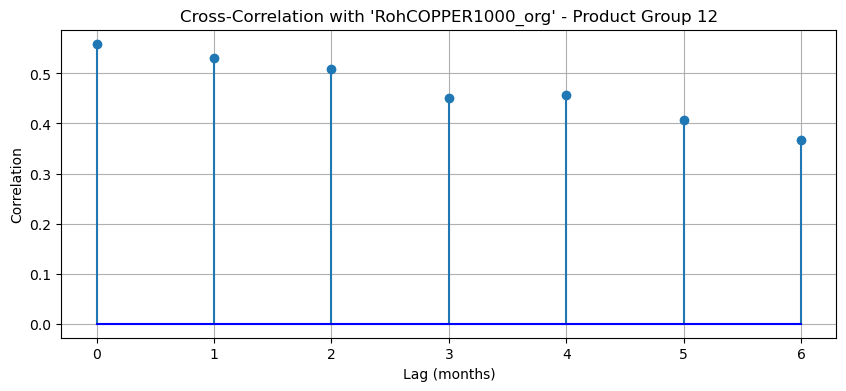

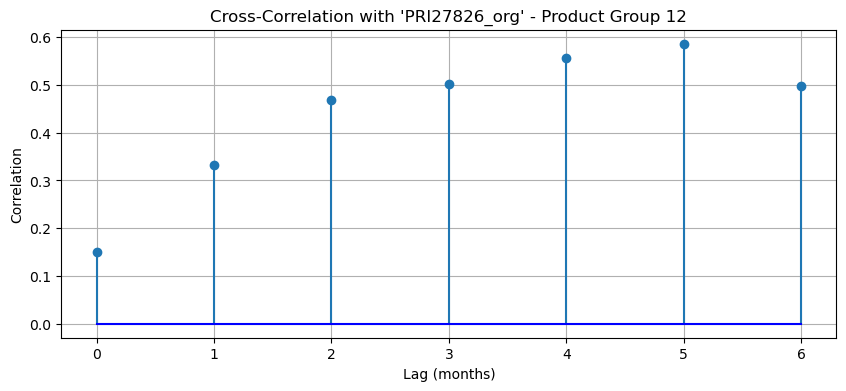

Selected Features for Product Group:
['MAB_ELE_PRO156', 'MAB_ELE_SHP156', 'RohiBASEMET1000_org', 'RohiMETMIN1000_org', 'RohCOPPER1000_org', 'PRI27826_org']


In [119]:
relevant_corr_12, selected_features_12 = plot_cross_correlation(
    sales_df=sales_agg12,
    market_df=df_market,
    product_group=12,
    max_lag=6,
    threshold=0.5
)

### Auto correlation

In [120]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_12)]

filtered_info_market

,Region,Index Name,Index Code
0,China,Production Index Machinery & Electricals,MAB_ELE_PRO156
1,China,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
18,World,Price of Base Metals,RohiBASEMET1000_org
20,World,Price of Metals & Minerals,RohiMETMIN1000_org
23,World,Price of Copper,RohCOPPER1000_org
26,United Kingdom,Electrical equipment,PRI27826_org


# Product Group 13

In [121]:
sales_agg13 = get_sales_by_product_group(df_sales, product_group=13)
sales_agg13.head()

,DATE,Sales_EUR
0,2018-10-01,27666.10
1,2018-11-01,68180.00
2,2018-12-01,15655.18
3,2019-01-01,27198.29
4,2019-02-01,32638.63


In [122]:
shapiro_result13 = shapiro_wilk_test(sales_agg13['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.900989
p-value: 0.001341

❌ The p-value (0.001341) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



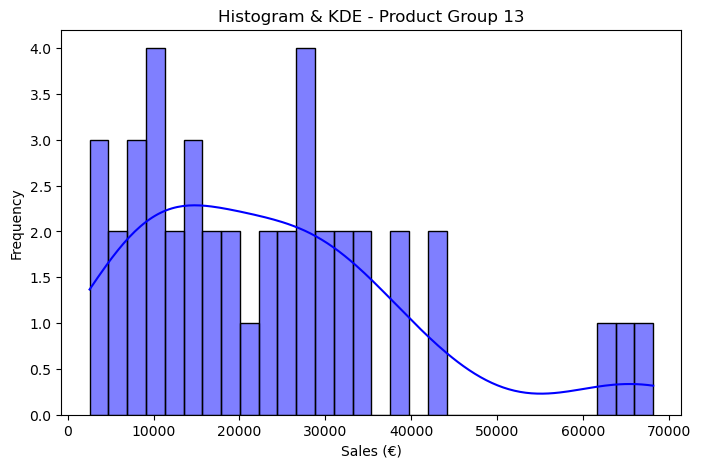

In [123]:
plot_distribution(sales_agg13['Sales_EUR'], product_group=13)

In [124]:
adf_result13 = adf_test(sales_agg13['Sales_EUR'], product_group=13)

Augmented Dickey-Fuller (ADF) Test - Product Group 13
ADF Statistic: -3.254199
p-value: 0.017054
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607

✅ The p-value (0.017054) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



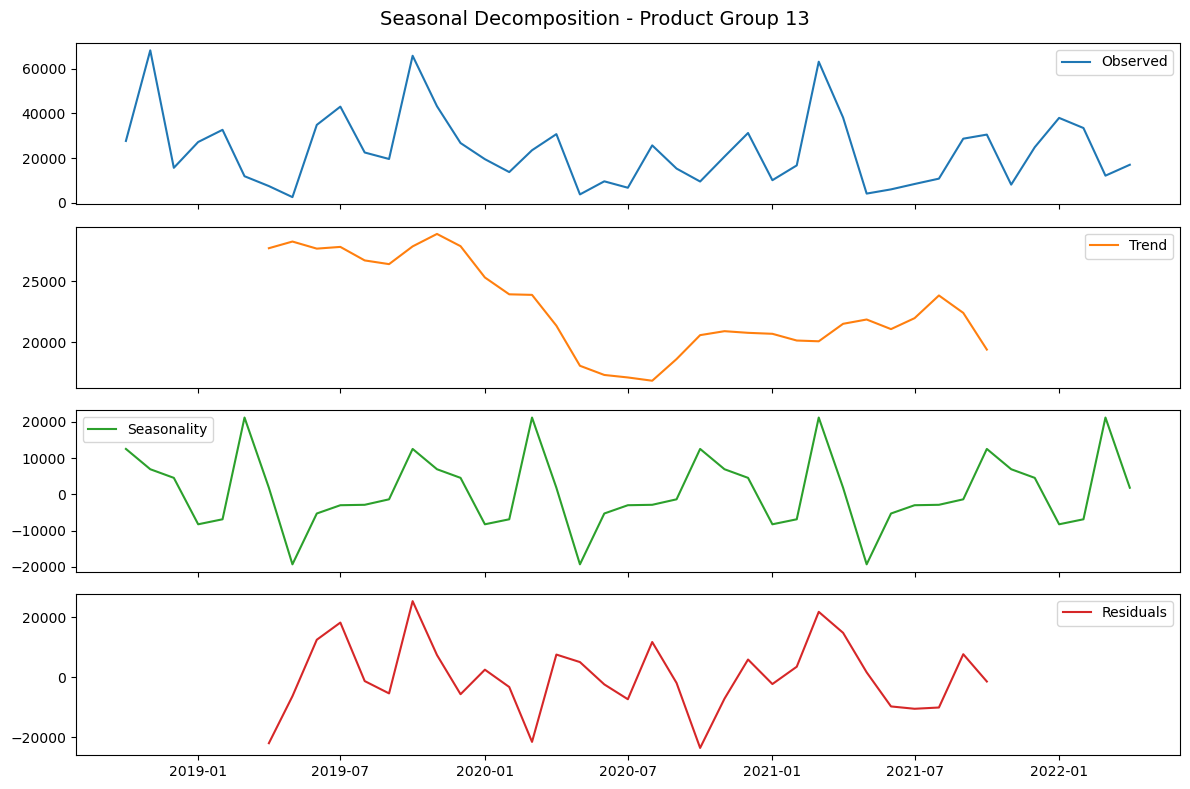

In [125]:
seasonal_decomposition(sales_agg13, product_group=13, date_column='DATE')

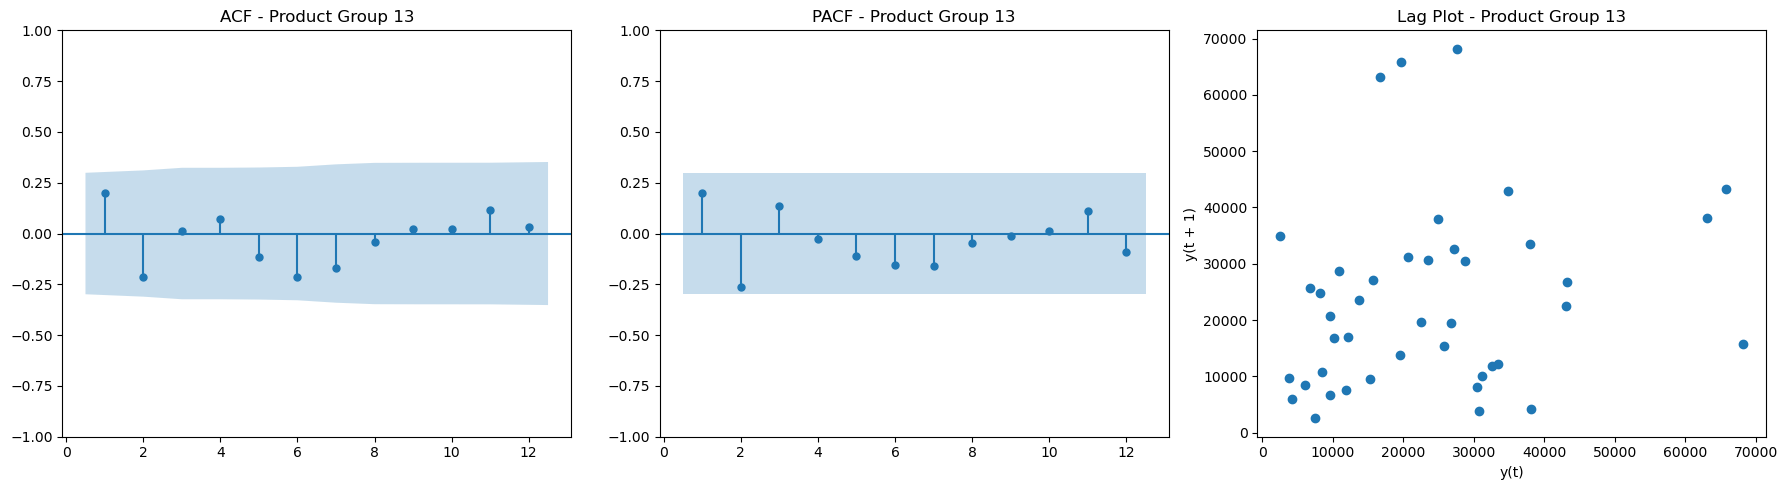

In [126]:
plot_acf_pacf(sales_agg13, product_group=13, max_lag=12)

## Feature selection

In [127]:
relevant_corr_13, selected_features_13 = plot_cross_correlation(
    sales_df=sales_agg13,
    market_df=df_market,
    product_group=13,
    max_lag=6,
    threshold=0.5
)


Selected Features for Product Group:
[]


In [128]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_13)]

filtered_info_market

,Region,Index Name,Index Code


# Product Group 14

In [129]:
sales_agg14 = get_sales_by_product_group(df_sales, product_group=14)
sales_agg14.head()

,DATE,Sales_EUR
0,2018-10-01,5770.0
1,2018-11-01,17130.0
2,2018-12-01,0.0
3,2019-01-01,1686.4
4,2019-02-01,19196.3


In [130]:
shapiro_result14 = shapiro_wilk_test(sales_agg14['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.686922
p-value: 0.000000

❌ The p-value (0.000000) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



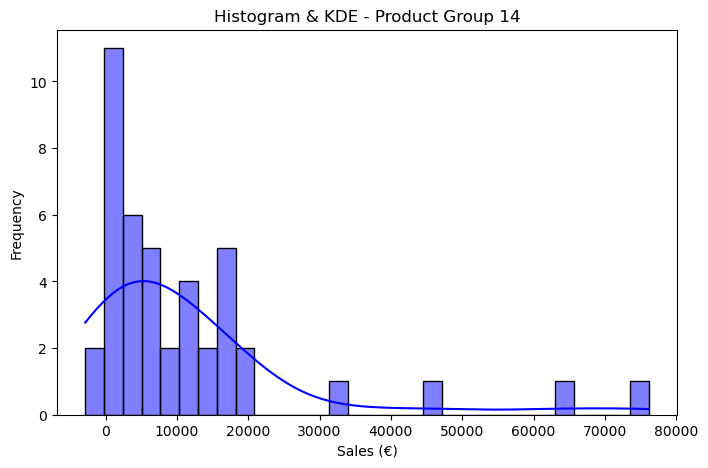

In [131]:
plot_distribution(sales_agg14['Sales_EUR'], product_group=14)

In [132]:
adf_result14 = adf_test(sales_agg14['Sales_EUR'], product_group=14)

Augmented Dickey-Fuller (ADF) Test - Product Group 14
ADF Statistic: -6.871822
p-value: 0.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605

✅ The p-value (0.000000) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



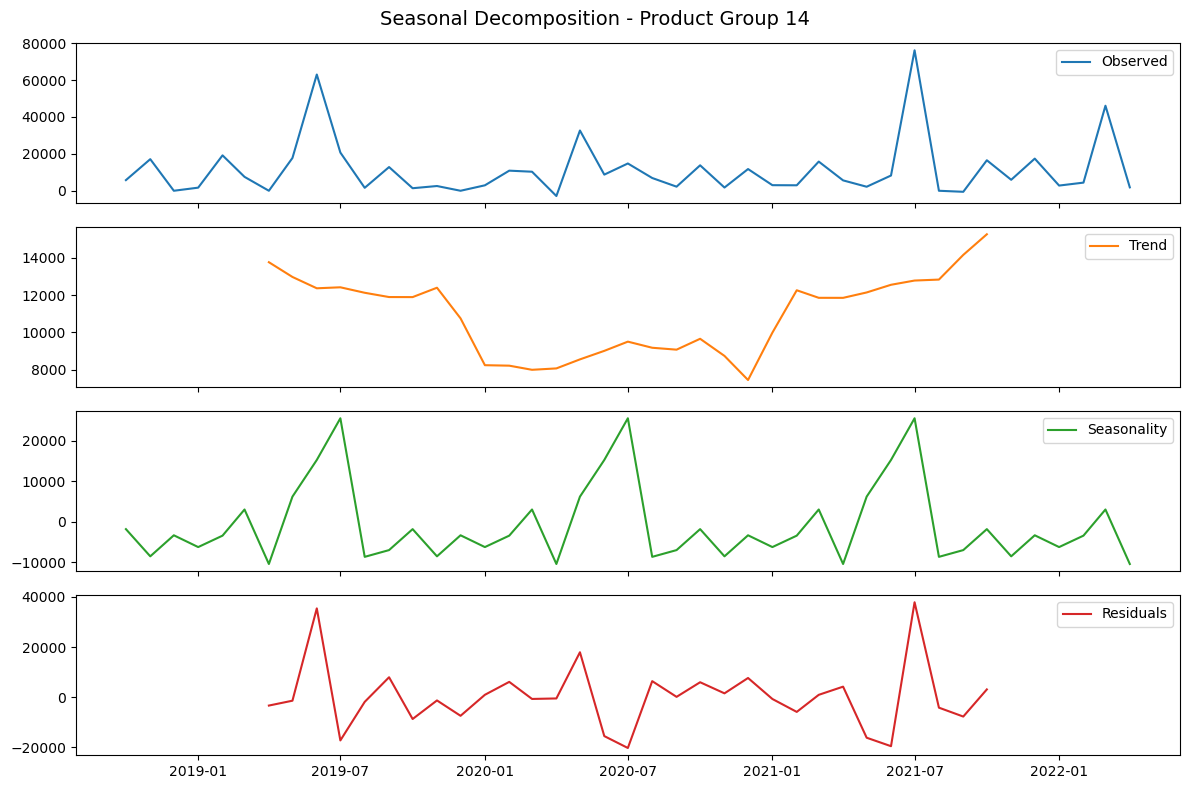

In [133]:
seasonal_decomposition(sales_agg14, product_group=14, date_column='DATE')

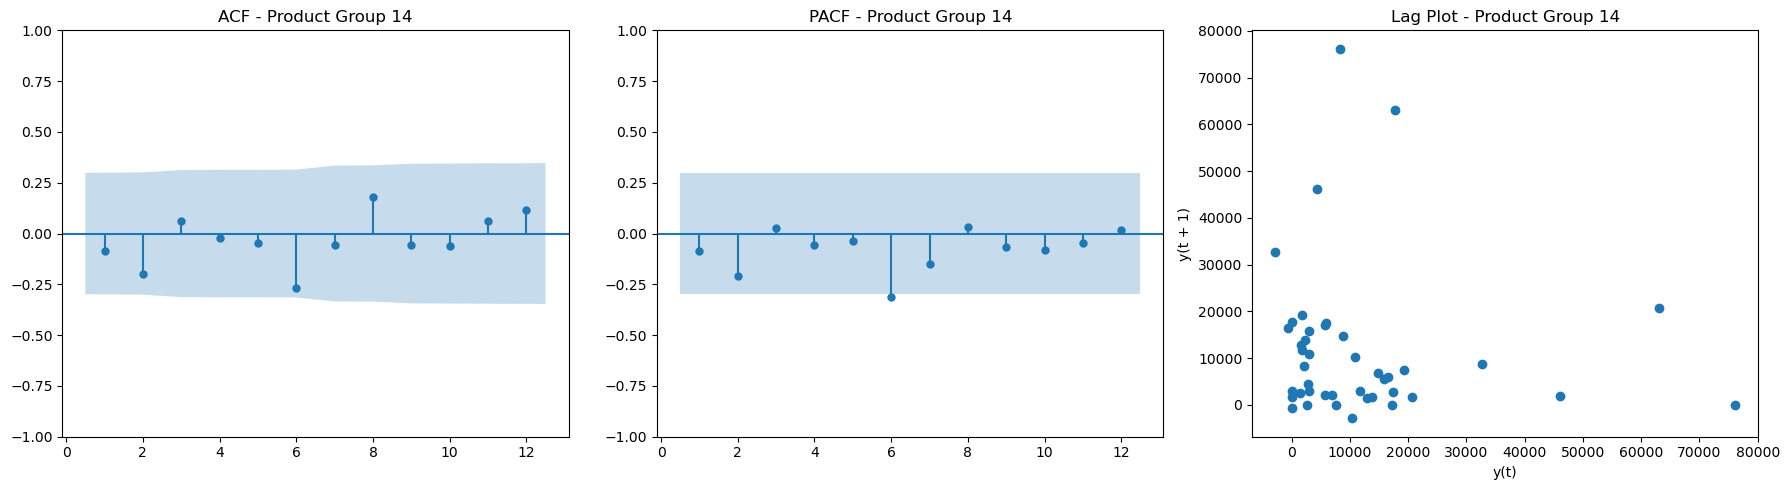

In [134]:
plot_acf_pacf(sales_agg14, product_group=14, max_lag=12)

## Feature selection

In [135]:
relevant_corr_14, selected_features_14 = plot_cross_correlation(
    sales_df=sales_agg14,
    market_df=df_market,
    product_group=14,
    max_lag=6,
    threshold=0.5
)


Selected Features for Product Group:
[]


In [136]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_14)]

filtered_info_market

,Region,Index Name,Index Code


# Product Group 16

In [137]:
sales_agg16 = get_sales_by_product_group(df_sales, product_group=16)
sales_agg16.head()

,DATE,Sales_EUR
0,2018-10-01,333196.87
1,2018-11-01,1377694.32
2,2018-12-01,4762524.66
3,2019-01-01,942957.19
4,2019-02-01,257765.04


In [138]:
shapiro_result16 = shapiro_wilk_test(sales_agg16['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.429564
p-value: 0.000000

❌ The p-value (0.000000) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



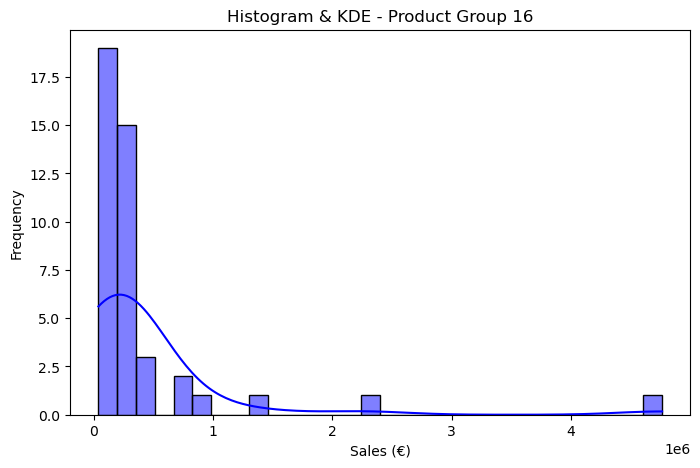

In [139]:
plot_distribution(sales_agg16['Sales_EUR'], product_group=16)

In [140]:
adf_result16 = adf_test(sales_agg16['Sales_EUR'], product_group=16)

Augmented Dickey-Fuller (ADF) Test - Product Group 16
ADF Statistic: -6.367204
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616

✅ The p-value (0.000000) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



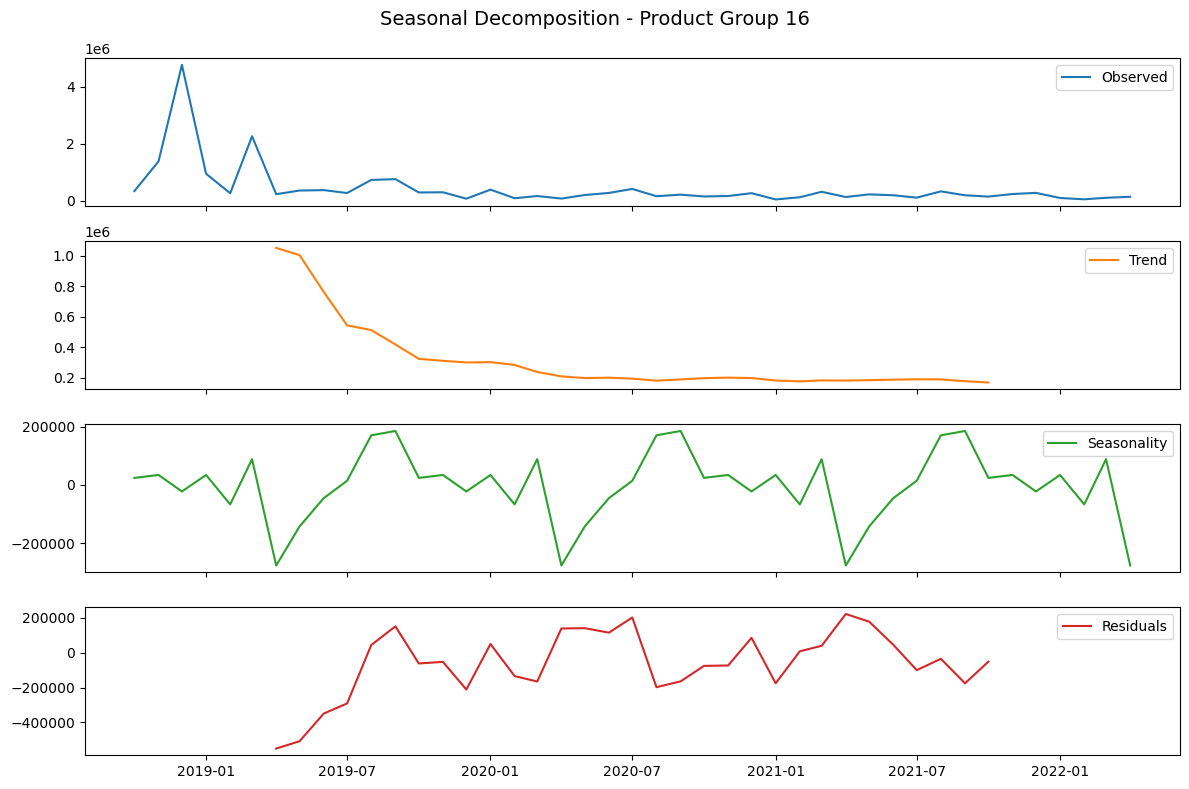

In [141]:
seasonal_decomposition(sales_agg16, product_group=16, date_column='DATE')

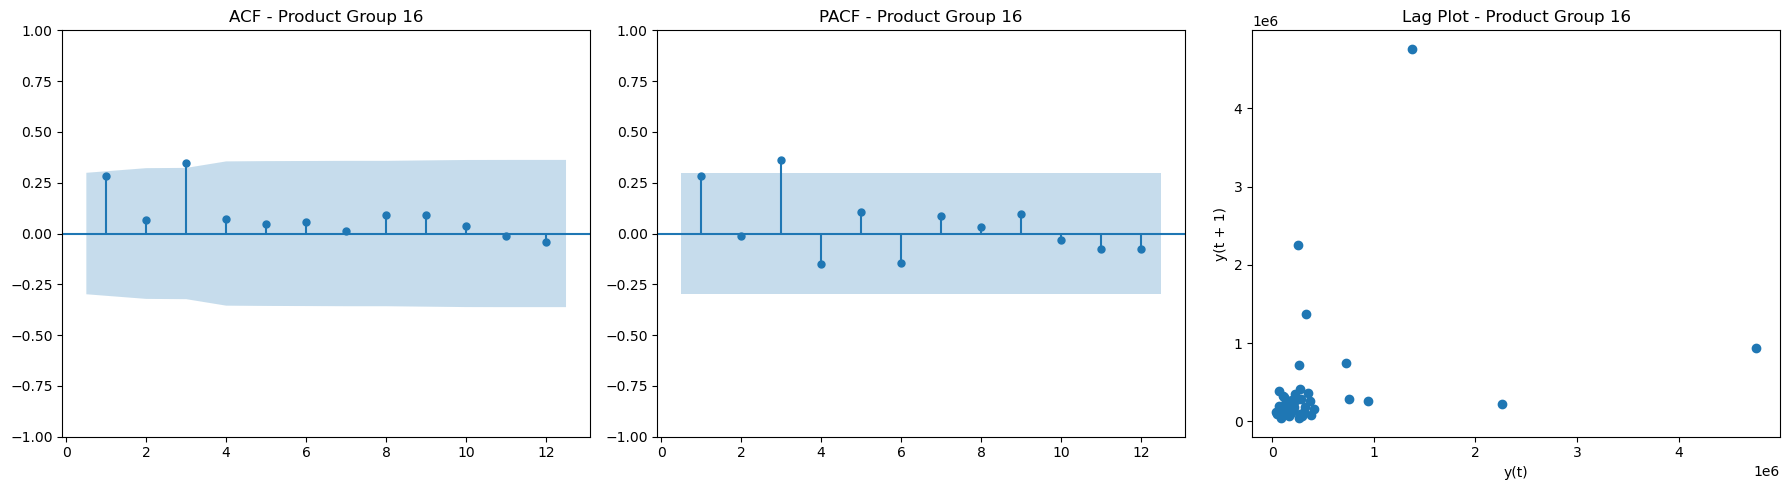

In [142]:
plot_acf_pacf(sales_agg16, product_group=16, max_lag=12)

## Feature selection

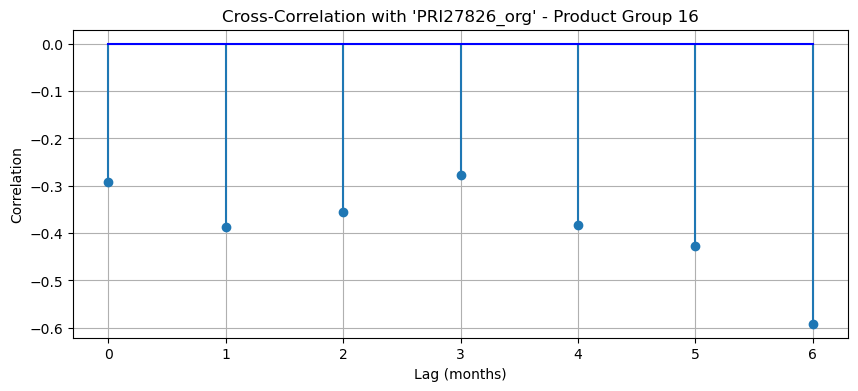

Selected Features for Product Group:
['PRI27826_org']


In [143]:
relevant_corr_16, selected_features_16 = plot_cross_correlation(
    sales_df=sales_agg16,
    market_df=df_market,
    product_group=16,
    max_lag=6,
    threshold=0.5
)

In [ ]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_16)]

filtered_info_market 

,Region,Index Name,Index Code
26,United Kingdom,Electrical equipment,PRI27826_org


# Product Group 20

In [145]:
sales_agg20 = get_sales_by_product_group(df_sales, product_group=20)
sales_agg20.head()

,DATE,Sales_EUR
0,2018-10-01,4563.14
1,2018-11-01,5798.14
2,2018-12-01,918.65
3,2019-01-01,2398.04
4,2019-02-01,620.66


In [146]:
shapiro_result20 = shapiro_wilk_test(sales_agg20['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.745145
p-value: 0.000000

❌ The p-value (0.000000) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



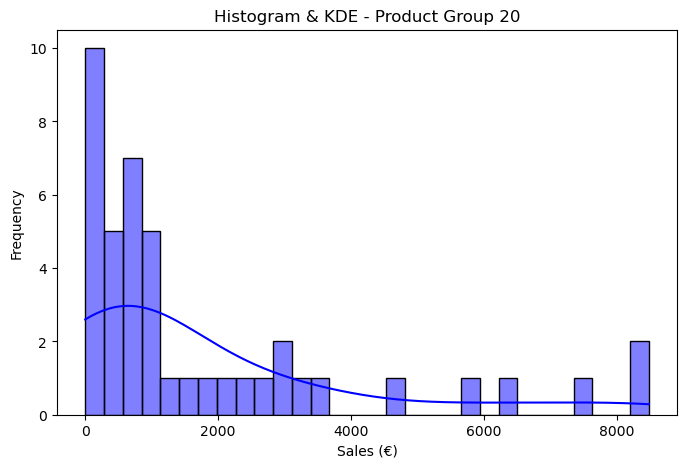

In [147]:
plot_distribution(sales_agg20['Sales_EUR'], product_group=20)

In [148]:
adf_result20 = adf_test(sales_agg20['Sales_EUR'], product_group=20)

Augmented Dickey-Fuller (ADF) Test - Product Group 20
ADF Statistic: -3.125179
p-value: 0.024745
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606

✅ The p-value (0.024745) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



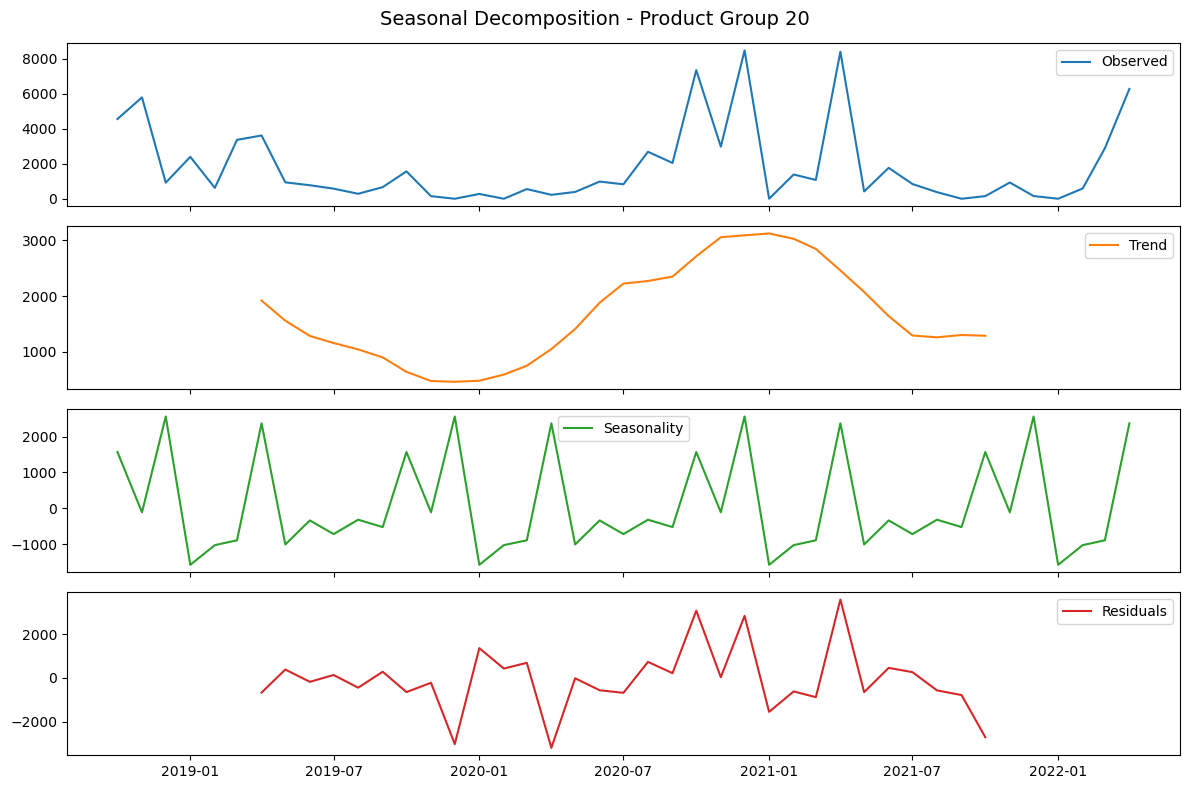

In [149]:
seasonal_decomposition(sales_agg20, product_group=20, date_column='DATE')

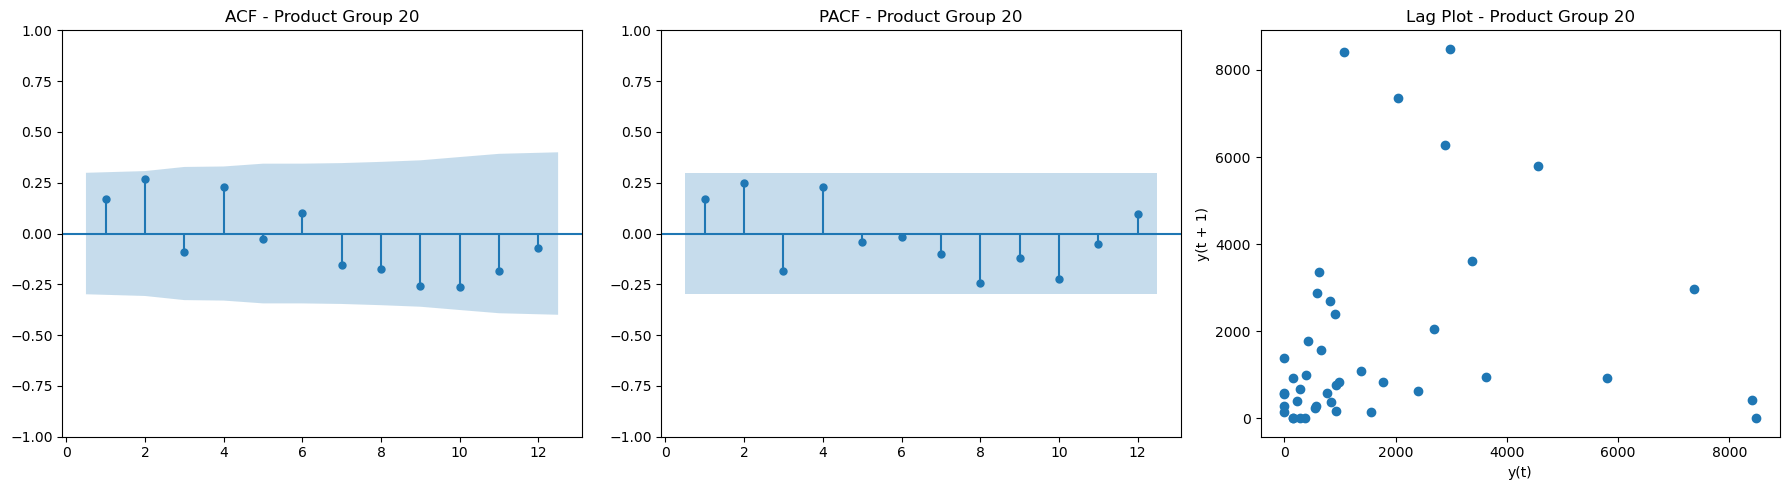

In [150]:
plot_acf_pacf(sales_agg20, product_group=20, max_lag=12)

## Feature selection

In [151]:
relevant_corr_20, selected_features_20 = plot_cross_correlation(
    sales_df=sales_agg20,
    market_df=df_market,
    product_group=20,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


In [152]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_20)]

filtered_info_market

,Region,Index Name,Index Code


# Product Group 36

In [153]:
sales_agg36 = get_sales_by_product_group(df_sales, product_group=36)
sales_agg36.head()

,DATE,Sales_EUR
0,2018-10-01,6474.60
1,2018-11-01,21617.61
2,2018-12-01,13924.52
3,2019-01-01,15444.39
4,2019-02-01,8051.15


In [154]:
shapiro_result36 = shapiro_wilk_test(sales_agg36['Sales_EUR'])

Shapiro-Wilk Test for Normality:
Statistic: 0.433648
p-value: 0.000000

❌ The p-value (0.000000) is less than 0.05.
   We reject the null hypothesis, meaning the data is not normally distributed.



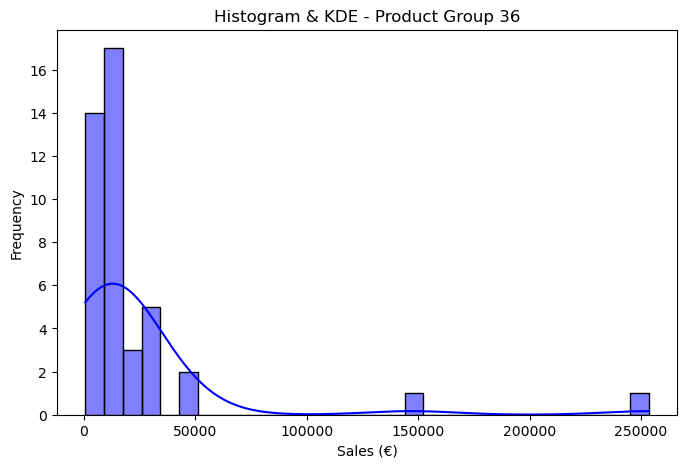

In [155]:
plot_distribution(sales_agg36['Sales_EUR'], product_group=36)

In [156]:
adf_result36 = adf_test(sales_agg36['Sales_EUR'], product_group=36)

Augmented Dickey-Fuller (ADF) Test - Product Group 36
ADF Statistic: -7.000027
p-value: 0.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605

✅ The p-value (0.000000) is ≤ 0.05.
   We reject the null hypothesis, meaning the data is stationary.



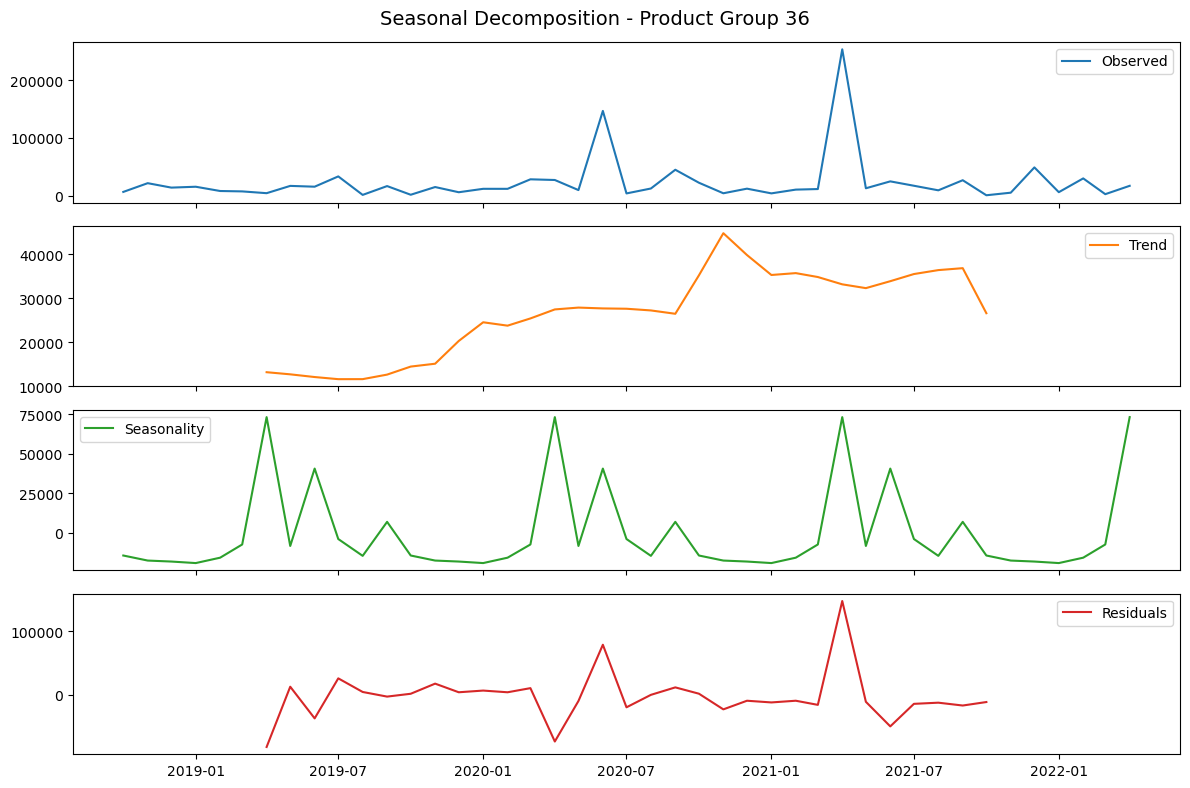

In [157]:
seasonal_decomposition(sales_agg36, product_group=36, date_column='DATE')

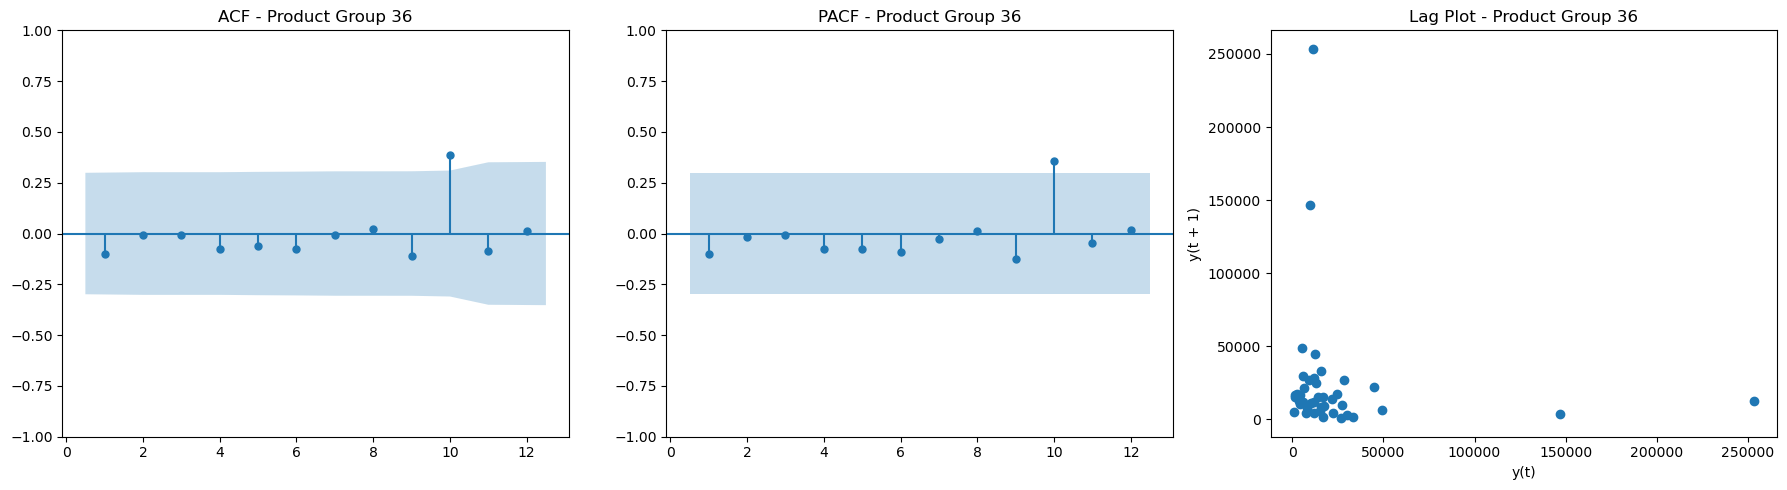

In [158]:
plot_acf_pacf(sales_agg36, product_group=36, max_lag=12)

## Feature selection

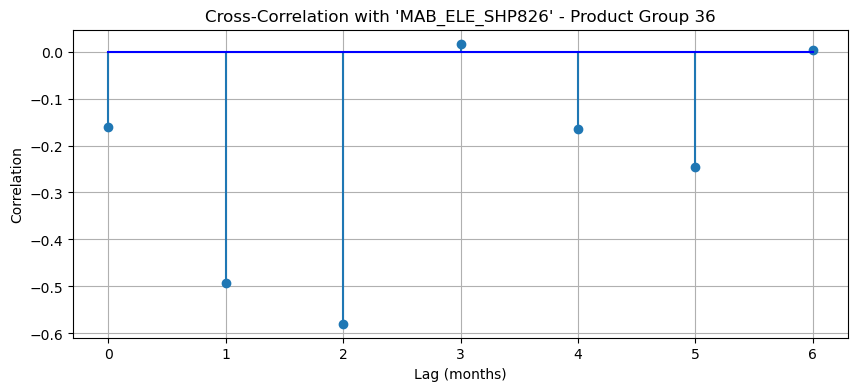

Selected Features for Product Group:
['MAB_ELE_SHP826']


In [159]:
relevant_corr_36, selected_features_36 = plot_cross_correlation(
    sales_df=sales_agg36,
    market_df=df_market,
    product_group=36,
    max_lag=6,
    threshold=0.5
)


In [160]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_36)]

filtered_info_market

,Region,Index Name,Index Code
13,United Kingdom,Shipments Index Machinery & Electricals,MAB_ELE_SHP826


# Export

In [161]:
selected_feature_goup = list(set(selected_features_1 + selected_features_3 + selected_features_4 + selected_features_5 + selected_features_6 + selected_features_8 + selected_features_9 + selected_features_11 + selected_features_12 + selected_features_13 + selected_features_14 + selected_features_16 + selected_features_20 + selected_features_36))
print(len(selected_feature_goup))

filtered_info_market = info_market[info_market['Index Code'].isin(selected_feature_goup)]

filtered_info_market

20


,Region,Index Name,Index Code
0,China,Production Index Machinery & Electricals,MAB_ELE_PRO156
1,China,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
3,France,Shipments Index Machinery & Electricals,MAB_ELE_SHP250
8,Japan,Production Index Machinery & Electricals,MAB_ELE_PRO392
9,Japan,Shipments Index Machinery & Electricals,MAB_ELE_SHP392
13,United Kingdom,Shipments Index Machinery & Electricals,MAB_ELE_SHP826
15,United States,Shipments Index Machinery & Electricals,MAB_ELE_SHP840
18,World,Price of Base Metals,RohiBASEMET1000_org
20,World,Price of Metals & Minerals,RohiMETMIN1000_org
21,World,Price of Natural gas index,RohiNATGAS1000_org


In [162]:
# Sales data for all product groups
sales_agg1.to_csv('../Data/sales_agg1.csv', index=False)
sales_agg3.to_csv('../Data/sales_agg3.csv', index=False)
sales_agg4.to_csv('../Data/sales_agg4.csv', index=False)
sales_agg5.to_csv('../Data/sales_agg5.csv', index=False)
sales_agg6.to_csv('../Data/sales_agg6.csv', index=False)
sales_agg8.to_csv('../Data/sales_agg8.csv', index=False)
sales_agg9.to_csv('../Data/sales_agg9.csv', index=False)
sales_agg11.to_csv('../Data/sales_agg11.csv', index=False)
sales_agg12.to_csv('../Data/sales_agg12.csv', index=False)
sales_agg13.to_csv('../Data/sales_agg13.csv', index=False)
sales_agg14.to_csv('../Data/sales_agg14.csv', index=False)
sales_agg16.to_csv('../Data/sales_agg16.csv', index=False)
sales_agg20.to_csv('../Data/sales_agg20.csv', index=False)
sales_agg36.to_csv('../Data/sales_agg36.csv', index=False)

# Market data
df_market.to_csv('../Data/df_market.csv', index=False)
info_market.to_csv('../Data/info_market.csv', index=False)
filtered_info_market.to_csv('../Data/filtered_info_market.csv', index=False)
